# Project 3 - Ensemble Techniques - Lautaro Cisterna

The dynamic of the notebook is slightly different than the order mentioned in Olympus. The main difference is that the model improvement and model tuning, is right after each default model. I just wanted to mention this because in the instructions of the project we can see that first is the model building (default models) and the improved models. In this NB, the dynamic will be Default model, and then that model with improvements and tuned hyperparameters.

This can be seen in the table of contents below, where we have for example Bagging Classifier, and the Bagging Classifier tuned.

<a id="section_toc"></a> 
## Table of contents

[Sanity Check and Exploratory Data Analysis](#section_sanity_check)
- [Statistical Summary](#section_statisticalsummary)
- [Missing Value check](#section_missingvaluecheck)
    - [Missing imputation](#section_missingimputation)
- [Exploratory Data Analysis](#section_exploratorydataanalysis)
    - [Analysis for non continuous variables](#section_analysysfornoncontinousvariables)
    - [Analysis for continuos variables](#section_analysisforcontinuosvariables)
    - [Heatmap](#section_heatmap)
    - [Customer profile - Package](#section_customerprofile)
    




[Getting data ready for modelling](#section_gettingdataready)
- [Splitting dataset](#section_splitting)
- [One Hot Encoding - Column Transformer - Pipeline](#section_ohe)





[Modelling](#section_modelling)
- [Function to check performance metrics](#section_functionmetrics)

- [Bagging](#section_bagging)
    - [1) Bagging Classifier](#section_baggingclassifier)
        - [1.2) Bagging Classifier tuned](#section_bagginclassifiertuned)
    - [2) Random Forest](#section_randomforestclassifier)
        - [2.2) Random Forest tuned](#section_randomforestclassifiertuned1)
        - [2.3) Random Forest tuned - Feature Selection](#section_randomforestclassifiertuned2)
    - [3.) Decision Tree](#section_cart)
        - [3.2) Decision Tree tuned](#section_carttuned)
- [Boosting](#section_boosting)
    - [1) Ada Boost](#section_adaboost)
        - [1.2) Ada Boost tuned](#section_adaboosttuned)
    - [2) Gradient Boosting](#section_gradientboosting)
        - [2.2) Gadient Boosting tuned](#section_gradientboostingtuned)
    - [3) XGBoost](#section_xgboost)
        - [3.2) XGBoost tuned](#section_xgboosttuned)
- [Stacking](#section_stacking)




[Model Comparison](#section_model_comparison)
- [Treshold analysis](#section_treshold)
- [Insights and recommendations](#section_recommendations)



    







**Importing libraries**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading dataset**


In [2]:
df = pd.read_excel('Tourism.xlsx', sheet_name='Tourism')

<a id="section_sanity_check"></a> 
# Sanity Check and Exploratory Data Analysis

In this section I'll focus mainly on the sanity check, the exploratory data analysis, and some preprocessing like imputing missing values or dealing with ouliers.

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisited,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.shape

(4888, 20)

In [5]:
df.duplicated().any() #Check duplicates in the dataset

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CustomerID               4888 non-null   int64  
 1   ProdTaken                4888 non-null   int64  
 2   Age                      4662 non-null   float64
 3   TypeofContact            4863 non-null   object 
 4   CityTier                 4888 non-null   int64  
 5   DurationOfPitch          4637 non-null   float64
 6   Occupation               4888 non-null   object 
 7   Gender                   4888 non-null   object 
 8   NumberOfPersonVisited    4888 non-null   int64  
 9   NumberOfFollowups        4843 non-null   float64
 10  ProductPitched           4888 non-null   object 
 11  PreferredPropertyStar    4862 non-null   float64
 12  MaritalStatus            4888 non-null   object 
 13  NumberOfTrips            4748 non-null   float64
 14  Passport                

In [7]:
var_list = df.columns.tolist()
result_df = pd.DataFrame(columns = ['Variable', 'Type', 'Format'])

for i in range(len(var_list)):
    if df[var_list[i]].dtype in ['int64', 'float64']:
        var_type = 'Num.'
    else:
        var_type = 'Cat.'
    new_row = pd.Series([var_list[i], var_type, df[var_list[i]].dtype],
                       index=['Variable', 'Type', 'Format'])
    
    result_df = result_df.append(new_row, ignore_index=True)

result_df.index+=1
result_df

,Variable,Type,Format
1,CustomerID,Num.,int64
2,ProdTaken,Num.,int64
3,Age,Num.,float64
4,TypeofContact,Cat.,object
5,CityTier,Num.,int64
6,DurationOfPitch,Num.,float64
7,Occupation,Cat.,object
8,Gender,Cat.,object
9,NumberOfPersonVisited,Num.,int64
10,NumberOfFollowups,Num.,float64


Printing unique values for categorical variables.

In [8]:
for var in result_df.loc[result_df.Type=="Cat.", "Variable"].unique().tolist():
    print("--"*30)
    print("Uniques values for " + var)
    display(df[var].value_counts(normalize=True, dropna=False))

------------------------------------------------------------
Uniques values for TypeofContact


Self Enquiry       0.704583
Company Invited    0.290303
NaN                0.005115
Name: TypeofContact, dtype: float64

------------------------------------------------------------
Uniques values for Occupation


Salaried          0.484452
Small Business    0.426350
Large Business    0.088789
Free Lancer       0.000409
Name: Occupation, dtype: float64

------------------------------------------------------------
Uniques values for Gender


Male       0.596563
Female     0.371727
Fe Male    0.031710
Name: Gender, dtype: float64

------------------------------------------------------------
Uniques values for ProductPitched


Basic           0.376841
Deluxe          0.354337
Standard        0.151800
Super Deluxe    0.069967
King            0.047054
Name: ProductPitched, dtype: float64

------------------------------------------------------------
Uniques values for MaritalStatus


Married      0.478723
Divorced     0.194354
Single       0.187398
Unmarried    0.139525
Name: MaritalStatus, dtype: float64

------------------------------------------------------------
Uniques values for Designation


Executive         0.376841
Manager           0.354337
Senior Manager    0.151800
AVP               0.069967
VP                0.047054
Name: Designation, dtype: float64

We can see that in gender we have a category which is "Fe Male". I do not know if this was another possibility of gender, like the answer "Prefer not to answer", or if it is just a mistake with the data. 

I'll consider that Fe Male is Female, so I'm going to impute it.

In [9]:
df['Gender'].replace('Fe Male', "Female", inplace=True)
#Check
df.Gender.value_counts(1, dropna=False)

Male      0.596563
Female    0.403437
Name: Gender, dtype: float64

We can confirm that Fe Male was replaced by Female.

<a id="section_statisticalsummary"></a> 
**Statistical Summary**

In [10]:
df.describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisited,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisited,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


<a id="section_missingvaluecheck"></a> 
**Missing value check**

In [11]:
df.isna().sum() / df.shape[0]

CustomerID                 0.000000
ProdTaken                  0.000000
Age                        0.046236
TypeofContact              0.005115
CityTier                   0.000000
DurationOfPitch            0.051350
Occupation                 0.000000
Gender                     0.000000
NumberOfPersonVisited      0.000000
NumberOfFollowups          0.009206
ProductPitched             0.000000
PreferredPropertyStar      0.005319
MaritalStatus              0.000000
NumberOfTrips              0.028642
Passport                   0.000000
PitchSatisfactionScore     0.000000
OwnCar                     0.000000
NumberOfChildrenVisited    0.013502
Designation                0.000000
MonthlyIncome              0.047668
dtype: float64

<a id="section_missingimputation"></a> 
**Missing imputation**

We can see that we have some variables with some null observations. None of these features has more than 6% of null values. We could drop them but we must take into account that the dataset is quite small (less than 5K observations).

Features with less than 1% of null values (NumberOfFollowups, PreferredPropertyStar, TypeofContact) are going to be dropped. Feature with more than 1% are going to be imputed.

I will create new variables called "NameOfVariable_Imputed" where the null values are going to be imputed. As we did not learn any missing imputation yet, I will impute them by median(), mean() or mode(), depending on the distribution of each Feature. Of course this scenario could bias our model.

Features with null values

In [12]:
df.columns[df.isnull().any()].tolist()

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisited',
 'MonthlyIncome']

Dropping nulls from columns NumberOfFollowups and PreferredPropertyStar

In [13]:
df.dropna(subset=['NumberOfFollowups', "PreferredPropertyStar", "TypeofContact"], inplace=True)

Check again features with null values

In [14]:
null_vars = df.columns[df.isnull().any()].tolist() #We can confirm that  NumberOfFollowups and PreferredPropertyStar are not in the list anymore.
null_vars

['Age',
 'DurationOfPitch',
 'NumberOfTrips',
 'NumberOfChildrenVisited',
 'MonthlyIncome']

Check the dtype of these values with missing:

In [15]:
result_df[result_df.Variable.isin(null_vars)]

,Variable,Type,Format
3,Age,Num.,float64
6,DurationOfPitch,Num.,float64
14,NumberOfTrips,Num.,float64
18,NumberOfChildrenVisited,Num.,float64
20,MonthlyIncome,Num.,float64


Check the number of unique values for each.

In [16]:
for var in null_vars:
    print(var + " has " + str(df[var].nunique()) + " values.")

Age has 44 values.
DurationOfPitch has 34 values.
NumberOfTrips has 12 values.
NumberOfChildrenVisited has 4 values.
MonthlyIncome has 2437 values.


Check distributions and plots for these variables.

1) Age

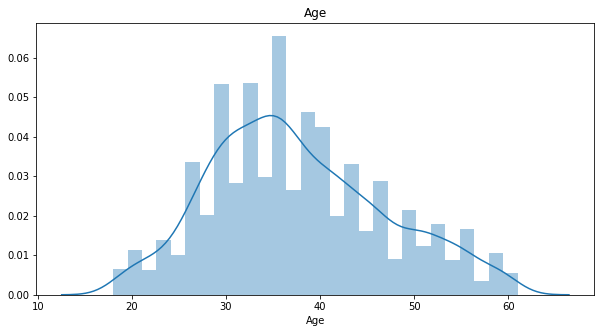

In [17]:
plt.figure(figsize = (10, 5))
plt.title("Age")
sns.distplot(df['Age']);

We can see that Age it is not very skewed, so the missing values are going to be filled with the mean.

In [18]:
#Filling NA with mean in Age.
df['Age_imputed'] = df['Age'].fillna(round(df['Age'].mean()))#The age must be rounded because the dataset contains absolute values for Age

2) DurationOfPitch

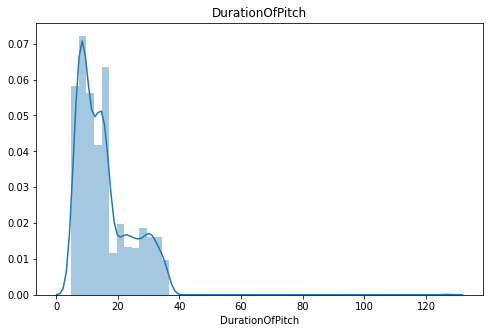

In [19]:
plt.figure(figsize = (8,5))
plt.title("DurationOfPitch")
sns.distplot(df['DurationOfPitch']);

We can see that DurationOfPitch is a bit skewed to the right, so the missing values are going to be filled with the median.

In [20]:
#Filling NA with mean in DurationOfPitch.
df['DurationOfPitch_imputed'] = df['DurationOfPitch'].fillna(df['DurationOfPitch'].median())

3) NumberOfTrips

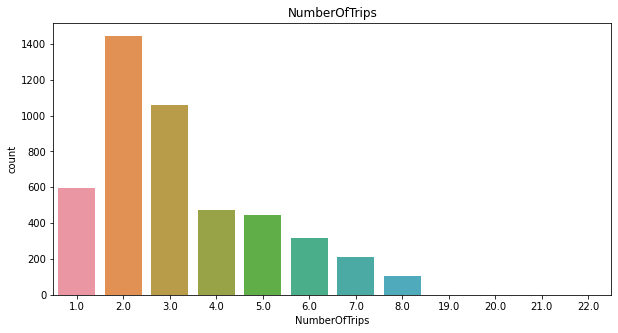

In [21]:
plt.figure(figsize = (10, 5))
plt.title("NumberOfTrips")
sns.countplot(df['NumberOfTrips']);

NumberOfTrips will be replaced with the median which is 3.

In [22]:
df['NumberOfTrips_imputed'] = df['NumberOfTrips'].fillna(df.NumberOfTrips.median())

4) NumberOfChildrenVisited

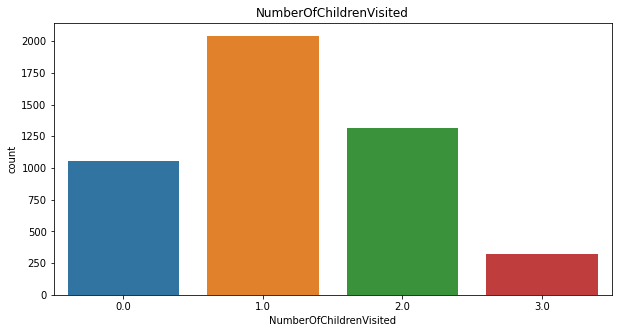

In [23]:
plt.figure(figsize = (10, 5))
plt.title("NumberOfChildrenVisited")
sns.countplot(df['NumberOfChildrenVisited']);

We are going to replace this value by the median

In [24]:
df['NumberOfChildrenVisited_imputed'] = df['NumberOfChildrenVisited'].fillna(df['NumberOfChildrenVisited'].median())

5) MonthlyIncome

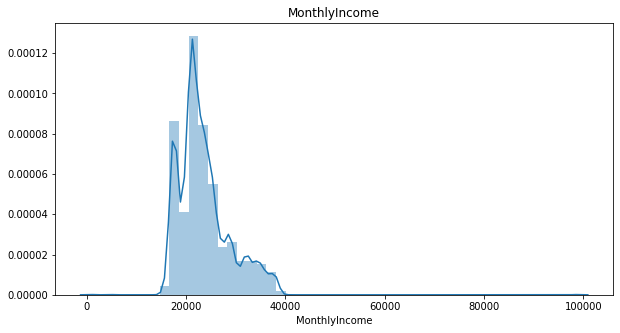

In [25]:
plt.figure(figsize = (10, 5))
plt.title("MonthlyIncome")
sns.distplot(df['MonthlyIncome']);

Null values are going to be replaced with median.

In [26]:
df['MonthlyIncome_imputed'] = df['MonthlyIncome'].fillna(df.MonthlyIncome.median())

<a id="section_exploratorydataanalysis"></a> 
**Exploratory Data Analysis**

Univariate Analysis

In [27]:
df.nunique() #Number of Uniques values per col

CustomerID                         4792
ProdTaken                             2
Age                                  44
TypeofContact                         2
CityTier                              3
DurationOfPitch                      34
Occupation                            4
Gender                                2
NumberOfPersonVisited                 5
NumberOfFollowups                     6
ProductPitched                        5
PreferredPropertyStar                 3
MaritalStatus                         4
NumberOfTrips                        12
Passport                              2
PitchSatisfactionScore                5
OwnCar                                2
NumberOfChildrenVisited               4
Designation                           5
MonthlyIncome                      2437
Age_imputed                          44
DurationOfPitch_imputed              34
NumberOfTrips_imputed                12
NumberOfChildrenVisited_imputed       4
MonthlyIncome_imputed              2438


<a id="section_analysysfornoncontinousvariables"></a> 
**Analysis for non continuos variables**

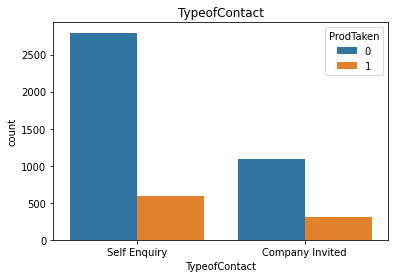

,TypeofContact,ProdTaken
0,Company Invited,0.218571
1,Self Enquiry,0.176002


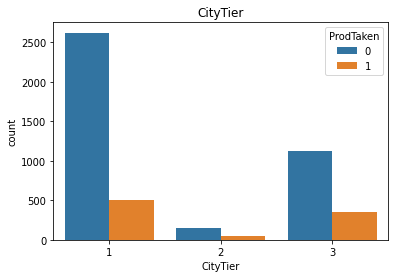

,CityTier,ProdTaken
0,1,0.162783
1,2,0.240838
2,3,0.236376


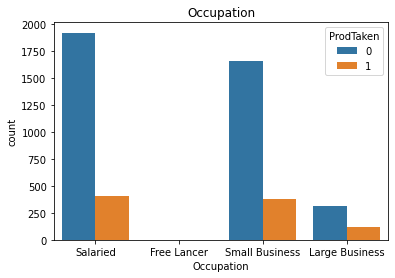

,Occupation,ProdTaken
0,Free Lancer,1.000000
1,Large Business,0.279070
2,Salaried,0.174903
3,Small Business,0.183965


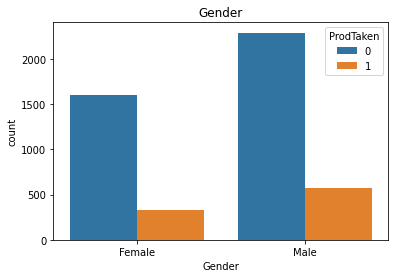

,Gender,ProdTaken
0,Female,0.173306
1,Male,0.198671


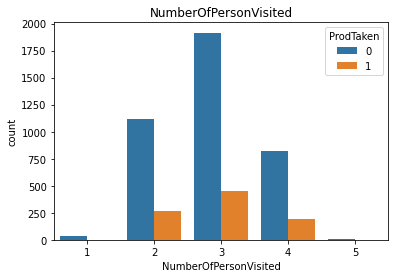

,NumberOfPersonVisited,ProdTaken
0,1,0.000000
1,2,0.190995
2,3,0.190617
3,4,0.187314
4,5,0.000000


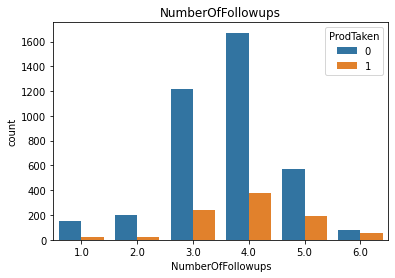

,NumberOfFollowups,ProdTaken
0,1.0,0.116279
1,2.0,0.105263
2,3.0,0.166209
3,4.0,0.183284
4,5.0,0.250000
5,6.0,0.400000


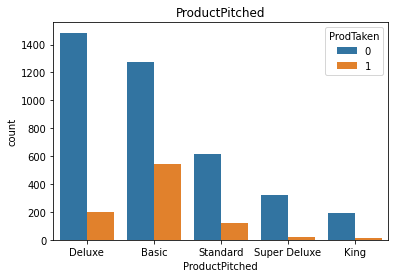

,ProductPitched,ProdTaken
0,Basic,0.299780
1,Deluxe,0.118171
2,King,0.077295
3,Standard,0.165992
4,Super Deluxe,0.058480


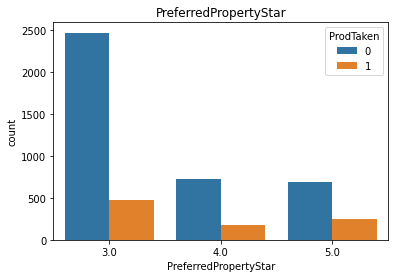

,PreferredPropertyStar,ProdTaken
0,3.0,0.162483
1,4.0,0.196231
2,5.0,0.262208


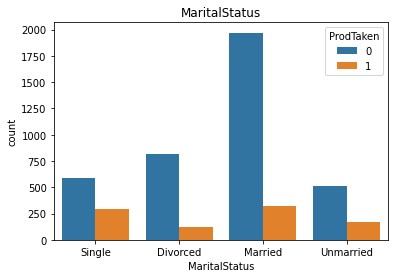

,MaritalStatus,ProdTaken
0,Divorced,0.127546
1,Married,0.140489
2,Single,0.334463
3,Unmarried,0.243402


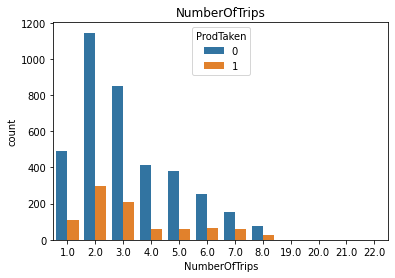

,NumberOfTrips,ProdTaken
0,1.0,0.180602
1,2.0,0.207064
2,3.0,0.199245
3,4.0,0.124473
4,5.0,0.137698
5,6.0,0.202532
6,7.0,0.276190
7,8.0,0.278846
8,19.0,1.000000
9,20.0,1.000000


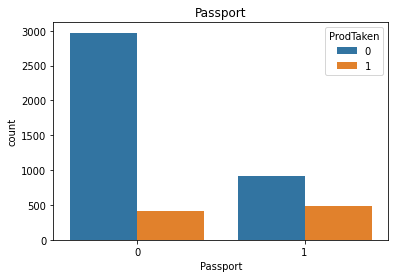

,Passport,ProdTaken
0,0,0.122268
1,1,0.347795


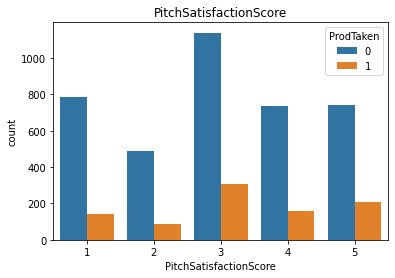

,PitchSatisfactionScore,ProdTaken
0,1,0.152104
1,2,0.149565
2,3,0.212707
3,4,0.179888
4,5,0.218585


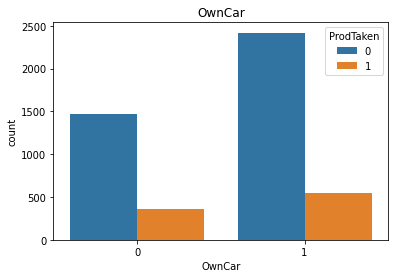

,OwnCar,ProdTaken
0,0,0.194962
1,1,0.184423


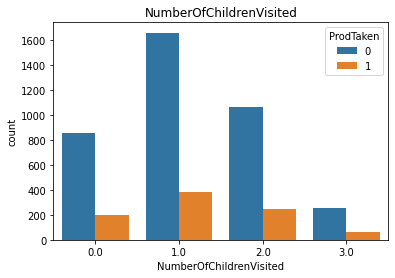

,NumberOfChildrenVisited,ProdTaken
0,0.0,0.187085
1,1.0,0.188633
2,2.0,0.190259
3,3.0,0.201258


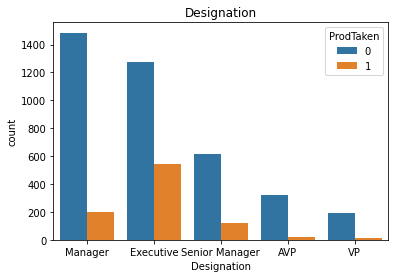

,Designation,ProdTaken
0,AVP,0.058480
1,Executive,0.299780
2,Manager,0.118171
3,Senior Manager,0.165992
4,VP,0.077295


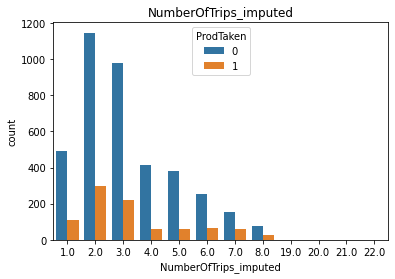

,NumberOfTrips_imputed,ProdTaken
0,1.0,0.180602
1,2.0,0.207064
2,3.0,0.185988
3,4.0,0.124473
4,5.0,0.137698
5,6.0,0.202532
6,7.0,0.276190
7,8.0,0.278846
8,19.0,1.000000
9,20.0,1.000000


In [28]:
for var in df.drop(columns=['MonthlyIncome', 'ProdTaken', 'Age', 'CustomerID'
                            ,'DurationOfPitch', 'MonthlyIncome_imputed', "NumberOfChildrenVisited_imputed",
                            "DurationOfPitch_imputed", "Age_imputed"]).columns.tolist():
    plt.title(var)
    sns.countplot(df[var], hue = df['ProdTaken'])
    plt.show()
    display(df.groupby(var)['ProdTaken'].mean().reset_index())

**Insights**

1) ```Type of contact```: We can see that we have more Self Inquiries than Company Invited. Also we can see that the proportion of product taken via self enquire is lower than the proportion were it was via Company Invited. Besides this, we can see than the absolute number of ProductTaken = 1 via Self Enquiry is almost double in comparisson with Company Invite.

2) ```CityTier```: We can see that the number CityTier = 3 is much bigger than the other options. Also, CityTier number 2 is not very populated in our dataset, so maybe this value of the variable won't help much when we train our model. Also, the amount of product taken = 1 is quite similar between CityTier 1 and 3.

3) ```Occupation```: Salaried and small Business al the most popular values within this feature. Also they had a very similar distribution of the independent variable (Product Taken). On the other side, we can see that Free Lancer has almost no observations at all (only 2 observations), and large business has not many observations, but it has a nice proportion of Product Taken = 1, which could be an insight to our model.

4) ```Gender```: We have more man than women (60% M vs 40% F), but the proportion of ProdTaken = 1 is almost the same. around 17 and 19/20 percent. So gender maybe is not a feature that will differentiate if a customer take the product or not.

5) ```NumberOfPersonVisited```: Here we can see that 1 or 5 could be outliers, as not many observations show 1 or 5 people coming with customer. Also it seems that 3 is the most common amount of people coming with customer (could be a family, and it's around 50%). Also we can see that categories 2, 3 and 4 (of people coming with customer) have a similar ProdTaken = 1 proportion, which is around 19%.


6) ```NumberOfFollowups```: Here we can see that there is relationship between this feature and the independent variable. We can see that as the number of follow up increases, the proportion of product taken increases. Also, we can see that the number of follow ups fall mainly within 3 and 4 follow ups. So we might take into account the number of followups to check if this helps the person to take the product.
We may think that this variable could be dropped because it depends on a pitch about other products. But maybe we can find a relationship that implies that the more follow ups, the proability of the customer to purchase the product is higher. So in this case the company should focus more on the follow up after pitches (something simillar with contacts in a collection model).

7) ```ProductPitched```: With Basic and Deluxe being the most popular categories, we can see that Basic has the biggest proportion of ProdTakdn = 1, which is almost 30%, followed by Standard with 16%. This feature seems good for predicting our independent variable. Even though Deluxe was the most popular ProductPitched, we can see that Basic and Standard (which are the two lowest categories) has the biggest conversion with ProdTaken, so this could mean something. It is important to say that the even though we are trying to predict if a customer purchase a product or not, the final objective of the project is to obtain valuable information to sell a new Product. This new product is not "Basic", nor "Deluxe" nor "Standard", etc. so this variable is going to be dropped from the model.

8) ```PreferredPropertyStar```: We can see that 3 stars was the most popular category within this feature. There is a relationship between this feature and the independent variable, where we can see that the higher the PreferredPropertyStar the higher is the probability of taking the product (thinking probability as the proportion of ProdTaken=1 depending on PreferredPropoertyStar).

9) ```Marital Status```: As we could expect, Married is the most popular category. This maybe was implied with numberOfPersonVisited, which most of those values lied between 2 and 4, meaning that maybe that were families, with married parents. Of course, that was just an hypothesis. Even tough this, the packages seems to be more taken by Single or Unmarried people.

10) ```Number of trips```: Most popular values lie within 1 to 7 trips in a year by customer. Also, there is a not very clear relationship between this feature and the independent variable.

11) ```Passport```: People with no passport are more common that people wih passport. Nevertheless, people with passport has a proportion of more than the double of no passport, of Producttaken = 1 (34% vs 12%).

12) ```PitchSatisfactionScore```: The most popular value is 3 (with 30%) followed by the rest of the options, which have a proportion around 19%, except for 2 which has a proportion of only 12%. There is no clear relationship between this variable and the independent variable. This variable will be dropped because it could depends on the "Pitched Product".

13) ```OwnCar```: We have more people who own a car than those who don't. But the proportion of ProdTaken = 1 is quite similar for both categories, so maybe this feature is not a powerfull predictor.

14) ```NumberOfChildrenVisited```: 1 or 2 are the most popular categories of thes feature, but again there is not a clear difference between proportion of ProdTaken.

15) ```Designation```: VP and AVP are not that common in the dataset, cause as we supposed it's a position with almost the highest ranks in a company. Also, the category "Executive" has the highest proportion of ProdTaken=1 (30%), followed by Senior Manager (20%).

16) ```NumberOfTrips```: 2 and 3 are the most popular number of trips. Also, there is no clear relationship between this feature and our independent variable. We cannot say that people with more number or visits have taken the product more, and also we cannot say that people whose number of trips was lower have taken the product less.

In [29]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome',
       'Age_imputed', 'DurationOfPitch_imputed', 'NumberOfTrips_imputed',
       'NumberOfChildrenVisited_imputed', 'MonthlyIncome_imputed'],
      dtype='object')

In [30]:
#Check what values of Designation are for "Self Enquiry" type of contact.
pd.crosstab(df['Designation'],df['TypeofContact'],  normalize='columns')

TypeofContact,Company Invited,Self Enquiry
Designation,,
AVP,0.068571,0.072524
Executive,0.364286,0.385613
Manager,0.379286,0.339917
Senior Manager,0.155714,0.154186
VP,0.032143,0.047759


I just wanted to check if Designation has only specific values for Company Invited, but I see that is not the case. The distribution among Designation related to TypeofContact is almost the same.

<a id="section_analysisforcontinuosvariables"></a> 
**Analysis for continuos variables**

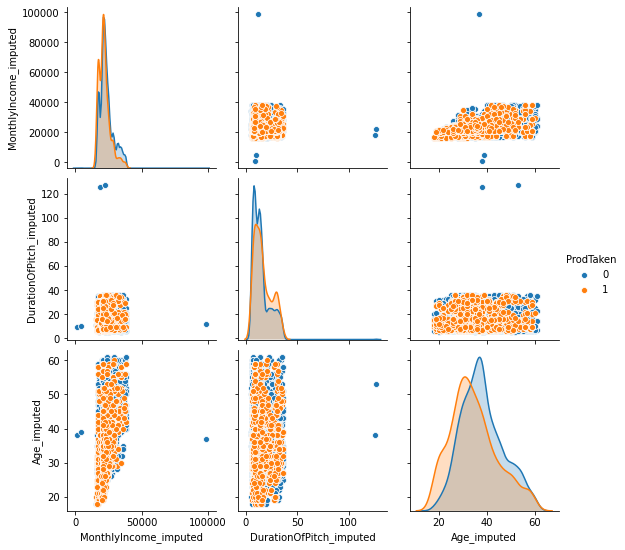

In [31]:
sns.pairplot(df[['MonthlyIncome_imputed', 'ProdTaken', 'DurationOfPitch_imputed', 'Age_imputed']], diag_kind='kde', hue='ProdTaken')

1) ```MonthlyIncome```

In [33]:
#I am going to bin the Monthly income in deciles to check if there is some relationship.

display(pd.crosstab(pd.qcut(df['MonthlyIncome_imputed'], 10), df['ProdTaken'], normalize='index'))
df['Monthly_Income_quintiles'] = pd.qcut(df['MonthlyIncome_imputed'], 5)


ProdTaken,0,1
MonthlyIncome_imputed,,
"(999.999, 17670.0]",0.671518,0.328482
"(17670.0, 19777.0]",0.774530,0.225470
"(19777.0, 20958.8]",0.794979,0.205021
"(20958.8, 21500.8]",0.732777,0.267223
"(21500.8, 22368.5]",0.831904,0.168096
"(22368.5, 23294.2]",0.845333,0.154667
"(23294.2, 24671.0]",0.860707,0.139293
"(24671.0, 26798.0]",0.857741,0.142259
"(26798.0, 31755.6]",0.847280,0.152720


Here we cannot see a very clear relationship. Maybe if we analize the first 3 bins we can say that the lower the M. Income, the highest proportion or probability of taking the product, but then in the next bins this relationship changes.

2) ```DurationOfPitch_imputed```

In [34]:
#I am going to bin the Duration Pitch in quintiles to check if there is some relationship.
pd.crosstab(pd.qcut(df['DurationOfPitch_imputed'], 5), df['ProdTaken'], normalize='index')

ProdTaken,0,1
DurationOfPitch_imputed,,
"(4.999, 8.0]",0.850103,0.149897
"(8.0, 12.0]",0.827899,0.172101
"(12.0, 15.0]",0.828989,0.171011
"(15.0, 23.0]",0.773933,0.226067
"(23.0, 127.0]",0.766892,0.233108


Here it seems that longer sales pitches have a slightly higher proportion of taking the product. Also we have to take into account that maybe this variable could help or not our model. I mean, maybe the pitch was longer cause the customer bought the product I he or she wanted to know more information about it; or the pitch was longer cause the salesman or saleswoman tried to sell the product no matter what. 

3) ```Àge```

In [35]:
#I am going to bin the Age in quintiles to check if there is some relationship.

#Dist among Y
display(pd.crosstab(pd.qcut(df['Age_imputed'], 5), df['ProdTaken'], normalize='index'))
df['Age_quintiles'] = pd.qcut(df['Age_imputed'], 5)

ProdTaken,0,1
Age_imputed,,
"(17.999, 30.0]",0.691460,0.308540
"(30.0, 35.0]",0.806293,0.193707
"(35.0, 38.0]",0.864532,0.135468
"(38.0, 45.0]",0.864662,0.135338
"(45.0, 61.0]",0.857900,0.142100


We can see that we have amost 60% of people between ages of 18 and 38; and 40% of people between 39 and 61. Also, there is no much variation among the quintiles, the only bin which has a significant difference is the bin with ages between 18 and 30, which has a ProdTaken rate near 30%.

<a id="section_heatmap"></a> 
**Correlation Matrix - Heatmap**

I will do a heatmap with the correlation matrix for all the features (I'll exclude Customer ID)

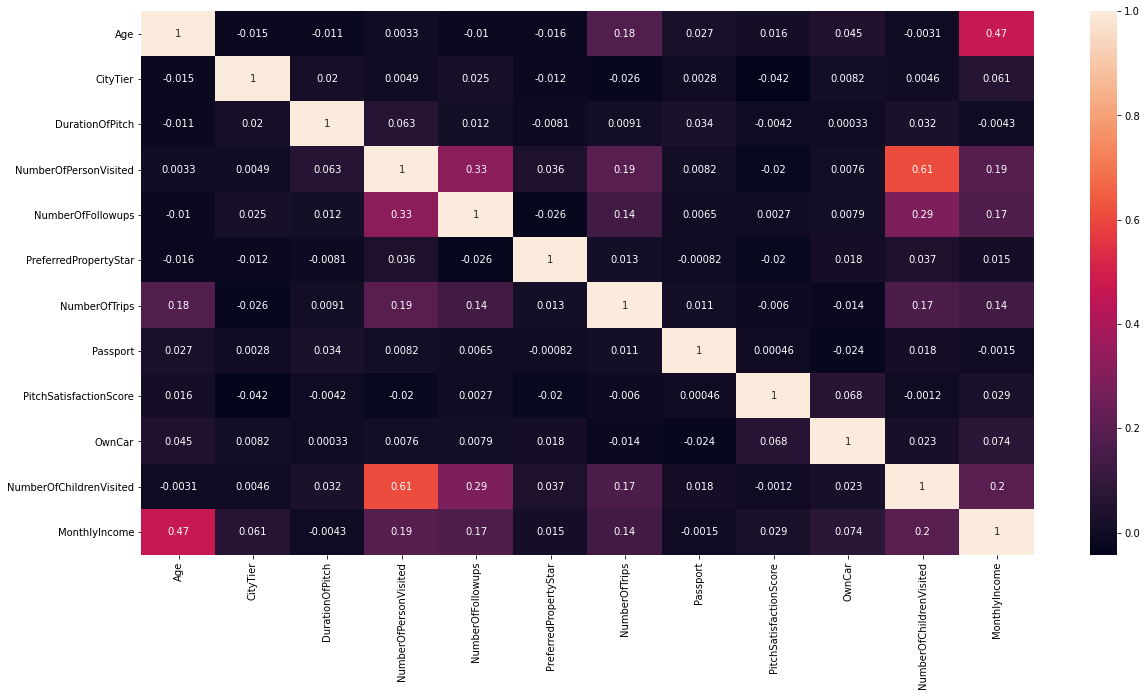

In [36]:
plt.figure(figsize = (20, 10))
sns.heatmap(df[['Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisited',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisited', 'Designation', 'MonthlyIncome', 'ProductPitched']].corr(), annot=True);

Luckily there is not much correlation between features. The highest correlations can be seen between Age and MonthlyIncome (even though is lower than 0.5) and between NumberOfChildren and NumberOfPersonVisited (which is 0.61). I am not going to drop any features for correlation issues.

**Heatmap with target variable**

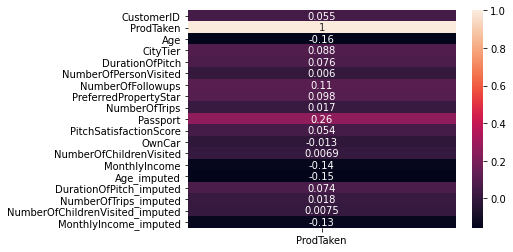

In [37]:
corr = df.corr()
target = corr[['ProdTaken']]
sns.heatmap(target, annot=True);

In terms of pearson correlation (linear correlation), we cannot see many features that has a strong linear relationship with the independent variable. Nevertheless, Decision trees and the algorithms that are going to be trained in this NB, are models that can handle relationships that are non-linear, so I would not drop variables considering the pearson correlation. 



<a id="section_customerprofile"></a> 
**Breef Customer Profile for packages**

In [38]:
#I filter ProdTaken=1 because for analyzing profiles of each package, I must obtain the customers who purchase each package.
#Also I assume that the product pitched was the product taken.
packages_customers = pd.pivot_table(data=df[df.ProdTaken==1], 
                                           values=['Age_imputed','MonthlyIncome_imputed',
                                                   'NumberOfPersonVisited', 'OwnCar', 'Passport', 'CustomerID'],
                                       index = ['ProductPitched'],
                                                aggfunc = {
                                               'Age_imputed':['mean'],
                                               'MonthlyIncome_imputed':'mean',
                                               'NumberOfPersonVisited':['mean'],
                                               'OwnCar':'sum',
                                               'Passport':'sum',
                                                'CustomerID': 'count'})

packages_customers                                                   

,Age_imputed,CustomerID,MonthlyIncome_imputed,NumberOfPersonVisited,OwnCar,Passport
,mean,count,mean,mean,sum,sum
ProductPitched,,,,,,
Basic,31.675229,545,20243.884404,2.908257,311,320
Deluxe,37.552764,199,23058.711055,2.954774,121,100
King,47.500000,16,33707.625000,2.750000,14,10
Standard,40.853659,123,25934.934959,2.959350,81,47
Super Deluxe,43.500000,20,29823.800000,2.700000,20,12


We can see that there is no big difference between packages descriptions (at least by using this features). 
For the basic package, customers have an average age of 32 (rounded), with an average monthly Income of 20k and who brought 3 people to the visit. Also, we can see that this category is the category where most people who own a car and have a passport. Even though this, this was the most popular cateogry, so that should be taken into account.

For the Deluxe Package, we have little bit more average age (around 38), and also a bit more income (23K). The number of poeple visited within this package is almost the same as basic, but the we have less customers who own a car and have a passport.

For the King package (the less popular one), we have an average age of 47, and a monthly income of 33.7K. Here we can see that this package maybe was taken but people with better financial possibilites, as the mean income is quite higher than other packages. Also 14 out of 16 people who purchase this package has a car, meaning that more than 95% of the people who took this package own a car. 

Related to the Standard Package, which was the 3rd most popular package, the average age is 40, with a monthly income of 26K. Also, the number of person visited within this package was very similar to the other packages. Also, most of the people who purchased this package, own a car, and less than 50% has a passport.

Lastly, the Super Deluxe Package, one of the less selected ones, has an average age of 43, with a monthly income of almost 30K (2nd after King). In this package, everyone who took it, owns a car, and almost 50% of this customers has a passport.

**Dealing with outliers?**

As we've seen during the module, the algorithms that are going to be presented in this NB, can handle outliers in some sense, so we are not going to drop any. Also, there were not MANY outliers in the features.

In case we want to deal with them, what I would probably do is cap them to the 99th percentile, instead of drop them. Of course this could bias our model.

# ----------------------------------------------------------------------------------------

<a id="section_gettingdataready"></a> 
# Getting data ready for modelling

My features are going to be all the features with imputed values. Also, as it is said before, I will drop some columns that weere analized in the EDA.

In [39]:
X = df[['TypeofContact', 'CityTier', 'Occupation', 'Gender', 'NumberOfPersonVisited',
       'NumberOfFollowups', 'PreferredPropertyStar','MaritalStatus','Passport', 
       'OwnCar', 'Designation','Age_imputed', 'DurationOfPitch_imputed', 'NumberOfTrips_imputed',
       'NumberOfChildrenVisited_imputed', 'MonthlyIncome_imputed']]

y = df['ProdTaken']

As we can see, I dropped the feature ```ProductPitched``` and ```PitchSatisfactionScore``` considering what I said before that our new product is non of these.

Also, I dropped ```CustomerID``` too, because this variable is useless for the model.

### -------------------------------------

Converting Gender and TypeofContat to numeric, as they are binary features, then we do not have to one hot encode them. This is also explained in a few cells below.

In [40]:
dicc_gender = {'Female':1, 'Male':0}
dicc_contact = {'Self Enquiry':1, 'Company Invited':0}

X['Gender'] = X['Gender'].map(dicc_gender)
X['TypeofContact'] = X['TypeofContact'].map(dicc_contact)

<a id="section_splitting"></a>
**Splitting the dataset**

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5, stratify=y)

In [42]:
print('The dist. of the target in the entire DF is:')
print(df['ProdTaken'].value_counts(normalize=True))
print()
print('The dist. of the target in the Y_train is:')
print(y_train.value_counts(normalize=True))
print()
print('The dist. of the target in the Y_test is:')
print(y_test.value_counts(normalize=True))

The dist. of the target in the entire DF is:
0    0.811561
1    0.188439
Name: ProdTaken, dtype: float64

The dist. of the target in the Y_train is:
0    0.811568
1    0.188432
Name: ProdTaken, dtype: float64

The dist. of the target in the Y_test is:
0    0.811544
1    0.188456
Name: ProdTaken, dtype: float64


We can see that the distribution is maintained between samples. It was expected because I used stratifi=y

<a id="section_ohe"></a>
**One hot encoding for categorical or non continuous features**

The variables that are:

- Occupation
- PreferredPropertyStar
- MaritalStatus
- Designation




- Passport and OwnCar are already "OneHot Encoded"

- Gender and TypeofContact were transformed to numeric. For gender, 1 means Female and 0 means Male; and for TypeofContact 1 means "Self Enquiry" and 0 means "CompanyInvited". There is no need to One hot encode this variables if we do this because it's binary and with this format will be already one hot encoded. This was done some cells above.

All of the other variables that ar non continuos, as CityTier, NumberOfPersonVisited, NumberOfChildrenVisited, etc. are ordinal, meaning 0>1>2>3>...>n. This is a relationship that I want the models to capture, so the ordinal features are not going to be one hot encoded.


**Utilizing OneHotEnconder with Column Transformer (using Pipelines)**

In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

Using this approach is analogous as doing get_dummies() before splitting X. One Hot Encoder and Column transformer uses less memory and is a a bit more efficient when we use Cross Validation with sklearn, since all these methods come form sklearn itself. 

Also, I will not drop any of the categories that are going to be One Hot Encoded, because maybe that could affect the splits of the trees.


In [44]:
#Using ohe, ct and pipeline

#Categories to encode
cat_cols = ['Occupation', 'PreferredPropertyStar', 'MaritalStatus', 'Designation']

#Intance of OHE
ohe = OneHotEncoder()
#Instance of CT
ct = make_column_transformer((ohe, cat_cols), remainder='passthrough', sparse_threshold = 0)
#remainder='passthrough' means that it won't do anything with the other categories that are not one hot encoded# 

#Creating X_train and X_test with get_dummies(), so later we can check the difference between performances.
X_gd = pd.get_dummies(X, columns=cat_cols, drop_first=False)

X_train_gd, X_test_gd, y_train_gd, y_test_gd = train_test_split(X_gd, y, test_size=0.3, random_state=5, stratify=y)

# ----------------------------------------------------------------------------------------

<a id="section_modelling"></a>
# Modelling

Before starting the modelling part, I want to analyze which metric I should use to check the performance of the models and fulfill the objective of the company.

The first thing that comes to my mind is **RECALL**. By improving the Recall, I will maximize the True Positive rate, but I will also obtain more False Positives.

On the other side, by focusing on **PRECISION**, the model would not make many mistakes in predicting False Positives. The problem with this, is that maybe we are loosing a lot of True Positives (predicting them as False Negatives).

So, here this trade off depends on the objective of the company. Even though the objective of the project is "to predict which customer is more likely to purchase the newly introduced travel package", the problem also says that the last marketing campaing had a high cost because customer were contacted randomly without looking at the data. So, if the company do now want to spend too much money in contacting customers that are not going to purchase the product (False Positives), and be sure that the money they spend in marketing (contacting customers that are going to buy the product), the metric for this approach would be **PRECISION**. Of course, as I said before, with this approach we are probably going to loose potential customers, by predicting them as False Negatives, **BUT** if the marketing budget is short and we want to make sure that the company focus and contact customers that are MOST likely to purchase, we should use precision.

**In conclusion**, during hyperparameter tuning, my scoring criteria will be "ROC_AUC", which handles the trade off between the True Positive Rate and the False Positive Rate. And then, with an interactive confusion matrix I will select the best treshold to improve the Precision of the model. This will be done at the end of the modelling part.

<a id="section_functionmetrics"></a>
**Function to check metrics**

In [45]:
def calculate_metrics(y_test, Y_predict, Y_predict_proba, Y_predict_train, Y_predict_proba_train):
    
    comparison_frame = pd.DataFrame({'Metrics':['Values'],'Train_Accuracy': round(accuracy_score(y_train, Y_predict_train),3),'Test_Accuracy': round(accuracy_score(y_test, Y_predict),3),
                                 'Train_Recall':round(recall_score(y_train, Y_predict_train),3),'Test_Recall':round(recall_score(y_test, Y_predict),3),
                                    'Train_Precision':round(precision_score(y_train, Y_predict_train),3),'Test_Precision':round(precision_score(y_test, Y_predict),3)}) 
    display(comparison_frame)
    
    print('Confusion Matrix:')

    
    confusion_log = confusion_matrix(y_test, Y_predict)
    sns.heatmap(confusion_log, annot=True, fmt='d')
    plt.ylabel('Actual')
    plt.xlabel('Predicted');
    plt.show()
    
    print("-"*100)
    
    comparison_frame_2 = pd.DataFrame({'Metrics':['Values'],'Train_ROC': round(roc_auc_score(y_train, Y_predict_proba_train[:,1]),3),'Test_ROC': round(roc_auc_score(y_test, Y_predict_proba[:,1]),3),
                                  }) 
    display(comparison_frame_2)

    print('ROC Curve:')


    fpr_log,tpr_log,thr_log = roc_curve(y_test, Y_predict_proba[:,1])
    fpr_log_train,tpr_log_train,thr_log_train = roc_curve(y_train, Y_predict_proba_train[:,1])
    

    df_log = pd.DataFrame(dict(fpr=fpr_log, tpr=tpr_log, thr = thr_log))
    df_log_train = pd.DataFrame(dict(fpr=fpr_log_train, tpr=tpr_log_train, thr = thr_log_train))
    
    
    plt.axis([0, 1.01, 0, 1.01])
    plt.xlabel('1 - Specificty')
    plt.ylabel('TPR / Sensitivity')
    plt.title('ROC Curve')
    plt.plot(df_log['fpr'],df_log['tpr'])
    plt.plot(df_log_train['fpr'],df_log_train['tpr'])
    plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
    plt.legend(['Test', 'Train'])
    plt.show()

    
    


# ----------------------------------------------------------------------------------------

<a id="section_bagging"></a>
# Bagging

<a id="section_baggingclassifier"></a>
### **1) Bagging Classifier**

In [46]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

In [47]:
#Instancing our model
bagging_estimator=BaggingClassifier(random_state=5)

#Creating pipeline
bg_pipe = make_pipeline(ct, bagging_estimator)

#Fitting
bg_pipe.fit(X_train, y_train)

#Test
y_pred_bagging_estimator = bg_pipe.predict(X_test)
y_pred_bagging_estimator_proba = bg_pipe.predict_proba(X_test)

#Train(just to check overfitting)
y_pred_bagging_estimator_train = bg_pipe.predict(X_train)
y_pred_bagging_estimator_proba_train = bg_pipe.predict_proba(X_train)

,Metrics,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Values,0.992,0.896,0.957,0.587,0.998,0.811


Confusion Matrix:


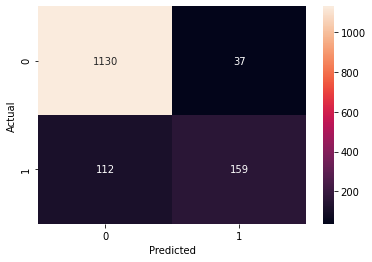

----------------------------------------------------------------------------------------------------


,Metrics,Train_ROC,Test_ROC
0,Values,1.0,0.902


ROC Curve:


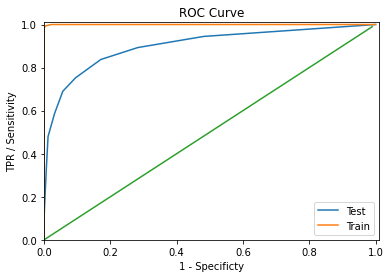

In [48]:
calculate_metrics(y_test, y_pred_bagging_estimator, y_pred_bagging_estimator_proba, y_pred_bagging_estimator_train,
                 y_pred_bagging_estimator_proba_train)

**Checking performance with get dummies**

,Metrics,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Values,0.991,0.897,0.956,0.583,0.998,0.819


Confusion Matrix:


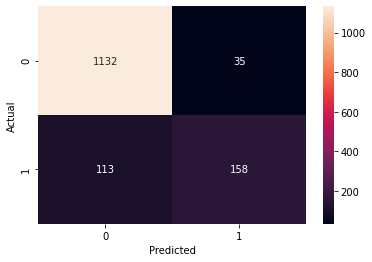

----------------------------------------------------------------------------------------------------


,Metrics,Train_ROC,Test_ROC
0,Values,1.0,0.904


ROC Curve:


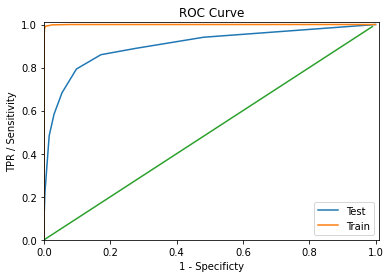

In [49]:
bagging_estimator.fit(X_train_gd, y_train_gd)
y_pred_bagging_gd = bagging_estimator.predict(X_test_gd)
y_pred_bagging_gd_proba = bagging_estimator.predict_proba(X_test_gd)

y_pred_bagging_gd_train = bagging_estimator.predict(X_train_gd)
y_pred_bagging_gd_proba_train = bagging_estimator.predict_proba(X_train_gd)

calculate_metrics(y_test_gd, y_pred_bagging_gd, y_pred_bagging_gd_proba, y_pred_bagging_gd_train,
                 y_pred_bagging_gd_proba_train)

**1st Insights**

As I said before, both approaches (get_dummies and OHE and CT ) have a very similar performances. 


Now, focusing on the model performance itself, the metrics on test are not bad, but we can see that our model **overfits** and it probably won't perfom well on new data (It does not generalizes well on new data).
This can be seen with the metrics showed above, were every metric in the test data is much lower than the metric in train. 

Also, if we take a look in the ROC curves, besides the test curve has a "nice" performance, if we compare it with the train curve, we can see that the model is overfitting.

# -----------------------

<a id="section_bagginclassifiertuned"></a>
### **1.2) Bagging Classifier Improved - Tuned**

**Tunning hyperparameters of Bagging Classifier with GridSearchCV**

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=42)

In [51]:
bg_pipe.named_steps.keys()

dict_keys(['columntransformer', 'baggingclassifier'])

In [52]:
#Parameters of gridsearch

param_grid_bgc = {'baggingclassifier__max_samples': [0.6,0.7,0.8,1], #Percentage of sample used in each classifier
              'baggingclassifier__max_features': [0.6,0.7,0.8,1], #Percetage of features used in each tree for splitting
              'baggingclassifier__n_estimators' : [250, 500,1000], #Number of estimators
                  'baggingclassifier__bootstrap' : [True, False],
                                    
             }

#I call it grid but I'll use RandomizedSearchCV instead of GridSearchCV because GridSearchCV was more expensive
#In computationally terms
grid_bg_tuned = RandomizedSearchCV(bg_pipe, param_grid_bgc, cv=folds, scoring='roc_auc', n_jobs=-1)

In [53]:
%time grid_bg_tuned.fit(X_train, y_train)

CPU times: user 9.37 s, sys: 230 ms, total: 9.6 s
Wall time: 1min 47s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                sparse_threshold=0,
                                                                transformers=[('onehotencoder',
                                                                               OneHotEncoder(),
                                                                               ['Occupation',
                                                                                'PreferredPropertyStar',
                                                                                'MaritalStatus',
                                                                                'Designation'])])),
                                             ('baggingclassifier',
                       

In [54]:
grid_bg_tuned.best_estimator_[1]

BaggingClassifier(bootstrap=False, max_features=0.8, max_samples=0.6,
                  n_estimators=1000, random_state=5)

Parameters obtained in CV search:
   
```BaggingClassifier(base_estimator=None, bootstrap=False,
                  bootstrap_features=False, max_features=0.7, max_samples=0.8,
                  n_estimators=500, n_jobs=None, oob_score=False,
                  random_state=5, verbose=0, warm_start=False)```


In [88]:
#Test
y_pred_bg_tuned = grid_bg_tuned.best_estimator_.predict(X_test)
y_pred_bg_tuned_proba = grid_bg_tuned.best_estimator_.predict_proba(X_test)

#Train
y_pred_bg_tuned_train = grid_bg_tuned.best_estimator_.predict(X_train)
y_pred_bg_tuned_proba_train = grid_bg_tuned.best_estimator_.predict_proba(X_train)

,Metrics,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Values,1.0,0.928,1.0,0.664,1.0,0.933


Confusion Matrix:


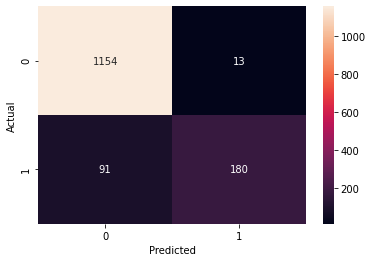

----------------------------------------------------------------------------------------------------


,Metrics,Train_ROC,Test_ROC
0,Values,1.0,0.827


ROC Curve:


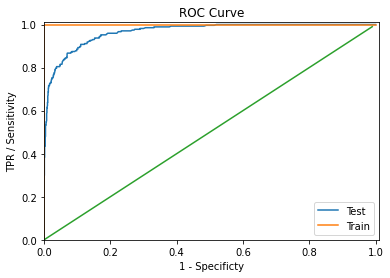

In [89]:
calculate_metrics(y_test, y_pred_bg_tuned, y_pred_bg_tuned_proba, y_pred_bg_tuned_train,
                 y_pred_bg_tuned_proba_train)

We can see that the performance of the model was improved (and almost excellent). The model has a very good precision score, but still, if we look at the ROC curve. we can see that the model is still slightly overfitted.

**Checking performance with get dummies**

,Metrics,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Values,1.0,0.924,1.0,0.694,1.0,0.874


Confusion Matrix:


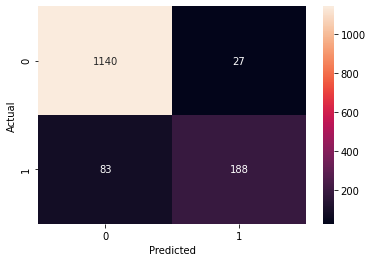

----------------------------------------------------------------------------------------------------


,Metrics,Train_ROC,Test_ROC
0,Values,1.0,0.835


ROC Curve:


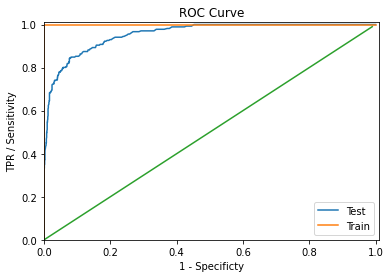

In [90]:
param_grid_bgc_gd = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,50,100,150,250,500,1000], 
                     'bootstrap' : [True,False],
             }


grid_bg_tuned_gd = RandomizedSearchCV(bagging_estimator, param_grid_bgc_gd, cv=folds, scoring='roc_auc')

grid_bg_tuned_gd.fit(X_train_gd, y_train_gd)


y_pred_bg_tuned_gd = grid_bg_tuned_gd.best_estimator_.predict(X_test_gd)
y_pred_bg_tuned_proba_gd = grid_bg_tuned_gd.best_estimator_.predict_proba(X_test_gd)

y_pred_bg_tuned_train_gd = grid_bg_tuned_gd.best_estimator_.predict(X_train_gd)
y_pred_bg_tuned_proba_train_gd = grid_bg_tuned_gd.best_estimator_.predict_proba(X_train_gd)

calculate_metrics(y_test_gd, y_pred_bg_tuned_gd, y_pred_bg_tuned_proba_gd, y_pred_bg_tuned_train_gd,
                 y_pred_bg_tuned_proba_train_gd)

Again we can check that both approaches (Get Dummies vs pipeline, ct and ohe), are quite similar, but the 1st approach have a slight better performance.

Even though the performance is quite similar, we can see that the best_estimator for each approach is slightly different. It's important to notice that as I used randomized search CV, the combinations could have been different for each approach.

In [91]:
print('Best Estimator with Grid Search using pipeline:')
print()
print(grid_bg_tuned.best_estimator_[1])
print()
print()
print('Best Estimator with Grid Search using get_dummies and no pipeline:')
print()
print(grid_bg_tuned_gd.best_estimator_)

Best Estimator with Grid Search using pipeline:

BaggingClassifier(base_estimator=None, bootstrap=False,
                  bootstrap_features=False, max_features=0.7, max_samples=0.8,
                  n_estimators=500, n_jobs=None, oob_score=False,
                  random_state=5, verbose=0, warm_start=False)


Best Estimator with Grid Search using get_dummies and no pipeline:

BaggingClassifier(base_estimator=None, bootstrap=False,
                  bootstrap_features=False, max_features=0.9, max_samples=0.8,
                  n_estimators=500, n_jobs=None, oob_score=False,
                  random_state=5, verbose=0, warm_start=False)


# -----------------------

<a id="section_randomforestclassifier"></a>
### **2) Random Forest Classifier**

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
rf_estimator = RandomForestClassifier(random_state=5, class_weight = {0: 0.2, 1: 0.8})
#I assing the class_weight 0.8 to ProdTaken=1, which has 0.2 in the DS, so our random forest gives more weight to this class

#Making pipeling
rf_pipe = make_pipeline(ct, rf_estimator)

#Fitting on training set
rf_pipe.fit(X_train, y_train)

#Test
y_pred_rf_estimator = rf_pipe.predict(X_test)
y_pred_rf_estimator_proba = rf_pipe.predict_proba(X_test)

#Train(just to check overfitting)
y_pred_rf_estimator_train = rf_pipe.predict(X_train)
y_pred_rf_estimator_proba_train = rf_pipe.predict_proba(X_train)

In [94]:
rf_pipe[1] #Check default parameters for RF

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.2, 1: 0.8}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=5, verbose=0, warm_start=False)

,Metrics,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Values,1.0,0.899,1.0,0.517,1.0,0.909


Confusion Matrix:


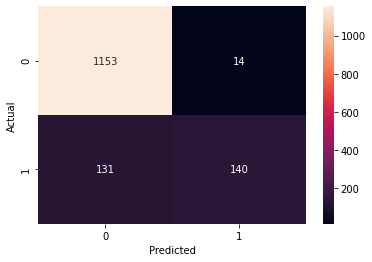

----------------------------------------------------------------------------------------------------


,Metrics,Train_ROC,Test_ROC
0,Values,1.0,0.752


ROC Curve:


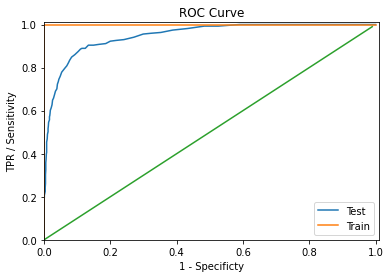

In [95]:
calculate_metrics(y_test, y_pred_rf_estimator, y_pred_rf_estimator_proba, y_pred_rf_estimator_train,
                 y_pred_rf_estimator_proba_train)

**1st Insights** 

We can see that the model performs well, but we still have the problem of Overfitting.

# -----------------------

<a id="section_randomforestclassifiertuned1"></a>
### 2.2) Random Forest Classifier improved - tuned

In [96]:
from sklearn.model_selection import RandomizedSearchCV

In [97]:
params = {'randomforestclassifier__n_estimators': [100, 200, 500, 1000, 1500, 2000], #Number of trees in the forest.
          #I will try higher number of estimators to see if I can reduce Overfitting the data.
          'randomforestclassifier__max_features': [0.4,0.5,0.7, 0.8, 0.9], #% of features. I will try not high numbers to check
          #If I can reduce overfitting.
          'randomforestclassifier__max_depth': [1,2,3,5,10,50, 'auto'],#Max_depth of each tree
          'randomforestclassifier__min_samples_split': [15, 20, 50, 100], #min samples per split
          'randomforestclassifier__min_samples_leaf': [1, 2, 5, 10],#min samples leaf
          'randomforestclassifier__bootstrap':[True, False],#Bootstrap sampling yes or no
            } 


#I'll again use Randomized search cv
grid_rf_tuned = RandomizedSearchCV(rf_pipe, params, 
                             scoring='roc_auc', cv=folds)



In [98]:
%time grid_rf_tuned.fit(X_train,y_train)

CPU times: user 3min 5s, sys: 1.97 s, total: 3min 7s
Wall time: 3min 9s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('columntransformer',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='passthrough',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('onehotencoder',
                                                                               OneHotEncoder(categories='auto',
                                                                                             drop=None,
                                                                                             dtype=<class 'num

In [99]:
print('Best estimator:')
display(grid_rf_tuned.best_estimator_[1])

Best estimator:


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.2, 1: 0.8}, criterion='gini',
                       max_depth=10, max_features=0.7, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=15, min_weight_fraction_leaf=0.0,
                       n_estimators=2000, n_jobs=None, oob_score=False,
                       random_state=5, verbose=0, warm_start=False)

Parameters obtained in the randomized search:
 
```RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.2, 1: 0.8}, criterion='gini',
                       max_depth=10, max_features=0.7, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=15, min_weight_fraction_leaf=0.0,
                       n_estimators=2000, n_jobs=None, oob_score=False,
                       random_state=5, verbose=0, warm_start=False)```


In [100]:
#Test
y_pred_rf_estimator_tuned = grid_rf_tuned.best_estimator_.predict(X_test)
y_pred_rf_estimator_proba_tuned = grid_rf_tuned.best_estimator_.predict_proba(X_test)

#Train(just to check overfitting)
y_pred_rf_estimator_train_tuned = grid_rf_tuned.best_estimator_.predict(X_train)
y_pred_rf_estimator_proba_train_tuned = grid_rf_tuned.best_estimator_.predict_proba(X_train)

,Metrics,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Values,0.896,0.828,0.853,0.661,0.679,0.536


Confusion Matrix:


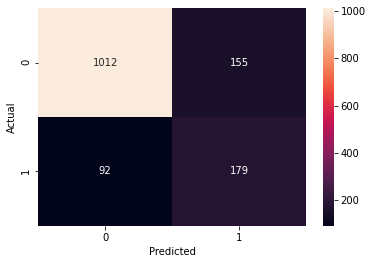

----------------------------------------------------------------------------------------------------


,Metrics,Train_ROC,Test_ROC
0,Values,0.88,0.764


ROC Curve:


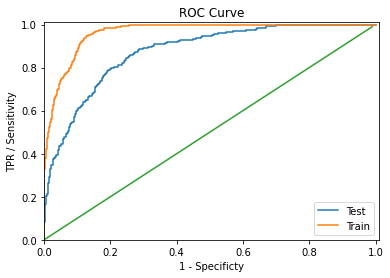

In [101]:
calculate_metrics(y_test, y_pred_rf_estimator_tuned, y_pred_rf_estimator_proba_tuned, y_pred_rf_estimator_train_tuned,
                 y_pred_rf_estimator_proba_train_tuned)

The performance is quite similar to previous models (a little worse). The metrics in test set are quite good, but we still have some overfitting (less than before but some).

# -----------------------

<a id="section_randomforestclassifiertuned2"></a>
### 2.3) Random Forest Classifier improved - tuned by FeatureSelection

I will use a sklearn method for feature selection called "SelectKbest" to check if by selecting less features our model does now overfit. 

SelectKBest class scores the features using a function (f_classif in this case) which uses ANOVA t-tests for feature selection. It is similar to a wrapper, that removes all the features but the k features with the highest score.

In [102]:
from sklearn.feature_selection import SelectKBest, f_classif

In [103]:
rf_pipe_tuned = make_pipeline(ct, SelectKBest(f_classif), rf_estimator)

param_selection = {'selectkbest__k':np.arange(1,31,4),#We have 30 features after onehot encoding that's why 32.
                  'randomforestclassifier__max_depth': [5,10,15]#I'll try low numbers to see if I can avoid overfitting
                  ,'randomforestclassifier__n_estimators':[100,300]
                  ,'randomforestclassifier__min_samples_leaf': [20, 30, 50, 100]} #Try high numbers to reduce O.fitting 

grid_rf_tuned_2 = RandomizedSearchCV(rf_pipe_tuned, param_selection, scoring='roc_auc', cv=folds)

In [137]:
grid_rf_tuned_2.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('columntransformer',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='passthrough',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('onehotencoder',
                                                                               OneHotEncoder(categories='auto',
                                                                                             drop=None,
                                                                                             dtype=<class 'num

In [138]:
grid_rf_tuned_2.best_estimator_[1] #I my run it was 25 features. But as it was a randomized search CV this could change.

SelectKBest(k=25, score_func=<function f_classif at 0x7fef544e1c20>)

In [139]:
grid_rf_tuned_2.best_estimator_[2] 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.2, 1: 0.8}, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=20,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=5, verbose=0, warm_start=False)

In case this is ran again, the randomized search give me these parameters:

```RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.2, 1: 0.8}, criterion='gini',
                       max_depth=15, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=20,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=5, verbose=0, warm_start=False)```
                       


,Metrics,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Values,0.855,0.809,0.761,0.649,0.59,0.496


Confusion Matrix:


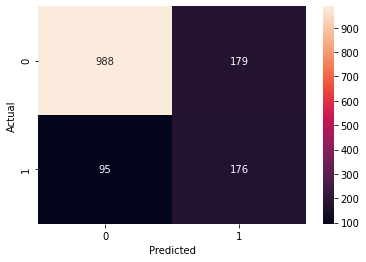

----------------------------------------------------------------------------------------------------


,Metrics,Train_ROC,Test_ROC
0,Values,0.819,0.748


ROC Curve:


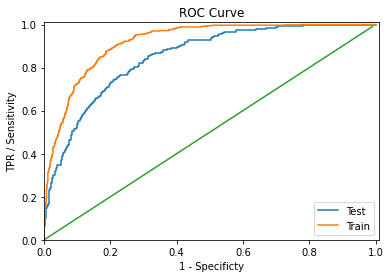

In [140]:
#Test
y_pred_rf_estimator_tuned_2 = grid_rf_tuned_2.best_estimator_.predict(X_test)
y_pred_rf_estimator_proba_tuned_2 = grid_rf_tuned_2.best_estimator_.predict_proba(X_test)

#Train(just to check overfitting)
y_pred_rf_estimator_train_tuned_2 = grid_rf_tuned_2.best_estimator_.predict(X_train)
y_pred_rf_estimator_proba_train_tuned_2 = grid_rf_tuned_2.best_estimator_.predict_proba(X_train)


calculate_metrics(y_test, y_pred_rf_estimator_tuned_2, y_pred_rf_estimator_proba_tuned_2, y_pred_rf_estimator_train_tuned_2,
                 y_pred_rf_estimator_proba_train_tuned_2)


The optimal k features utilizing SelectKBest with f_classif(ANOVA) was 25 (in this randomized search). I've ran it a few times and K lied within 25, 26, 27, 28 and 29. The performance in TEST is decent, even though is lower than previous models. But the positive thing here is that we can reduce overfitting, which is great.

Again, maybe if you run it again you'll arrive to different values because I used a randomized search cv.

**Checking feature importance for the tuned Random Forest** (This code was obtained in the NB "Ensemble_Techniques_Bagging")

This was done only for the last model which was a default random forest but with less features than the original X_train, using SelectKBest.

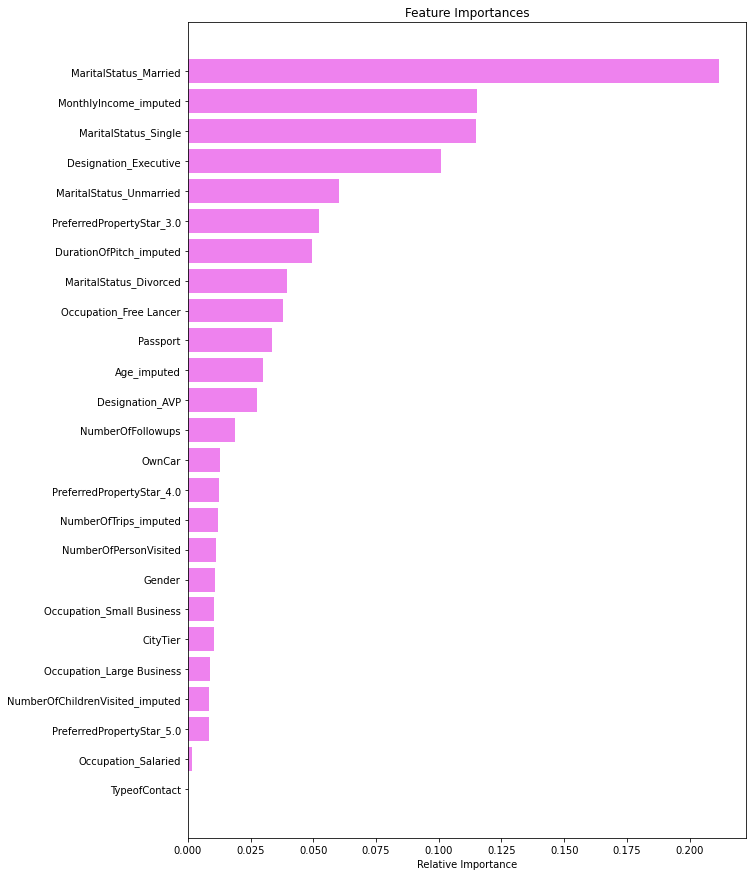

In [109]:
importances = grid_rf_tuned_2.best_estimator_[2].feature_importances_
indices = np.argsort(importances)
feature_names = list(X_gd.columns)

plt.figure(figsize=(10,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

As a Highlight we can see that Marital Status is a very important feature (at least for this last model).

# -----------------------

<a id="section_cart"></a>
### 3) Decision Tree

,Metrics,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Values,1.0,0.872,1.0,0.694,1.0,0.651


Confusion Matrix:


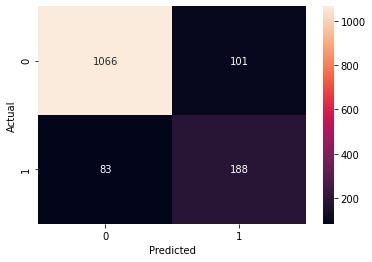

----------------------------------------------------------------------------------------------------


,Metrics,Train_ROC,Test_ROC
0,Values,1.0,0.804


ROC Curve:


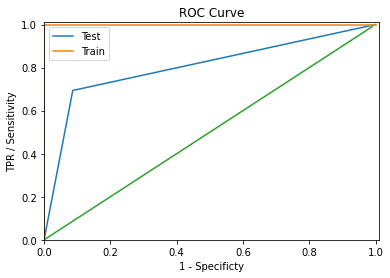

In [110]:
from sklearn.tree import DecisionTreeClassifier

tree_estimator = DecisionTreeClassifier(random_state=5)

tree_pipe = make_pipeline(ct, tree_estimator)

tree_pipe.fit(X_train, y_train)

y_pred_tree_estimator = tree_pipe.predict(X_test)
y_pred_tree_estimator_proba = tree_pipe.predict_proba(X_test)

#Train(just to check ovetreeitting)
y_pred_tree_estimator_train = tree_pipe.predict(X_train)
y_pred_tree_estimator_proba_train = tree_pipe.predict_proba(X_train)

calculate_metrics(y_test, y_pred_tree_estimator, y_pred_tree_estimator_proba, y_pred_tree_estimator_train,
                 y_pred_tree_estimator_proba_train)

Before runing the model, I expected that the overfitting would be higher. The model is overfitted, but not as much as I expected.

# -----------------------

<a id="section_carttuned"></a>
### 3.2) Decision Tree improved - tuned

In [111]:
tree_pipe.named_steps.keys() #Check keys to put in the grid search

dict_keys(['columntransformer', 'decisiontreeclassifier'])

In [112]:
param_tree = {'decisiontreeclassifier__max_depth': list(np.arange(2,20)) + [None], 
              'decisiontreeclassifier__min_samples_leaf': [1, 3, 5, 7, 10],
              'decisiontreeclassifier__max_leaf_nodes' : [2, 3, 5, 10, 15] + [None],
              'decisiontreeclassifier__min_impurity_decrease': [0.001, 0.01, 0.1, 0.0]
             }

grid_tree_tuned = GridSearchCV(tree_pipe, param_tree, cv=folds, scoring='roc_auc')

grid_tree_tuned.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,...
             param_grid={'decisiontreeclassifier__max_d

,Metrics,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Values,0.899,0.83,0.616,0.454,0.804,0.562


Confusion Matrix:


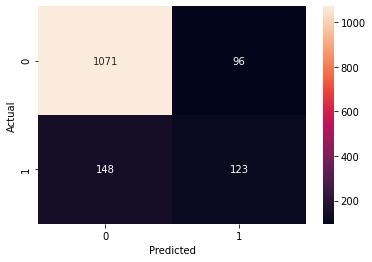

----------------------------------------------------------------------------------------------------


,Metrics,Train_ROC,Test_ROC
0,Values,0.79,0.686


ROC Curve:


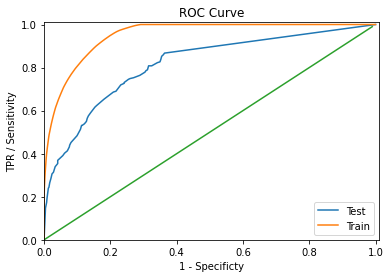

In [113]:
y_pred_tree_tuned = grid_tree_tuned.predict(X_test)
y_pred_tree_tuned_proba = grid_tree_tuned.predict_proba(X_test)

#Train(just to check ovetreeitting)
y_pred_tree_tuned_train = grid_tree_tuned.predict(X_train)
y_pred_tree_tuned_proba_train = grid_tree_tuned.predict_proba(X_train)

calculate_metrics(y_test, y_pred_tree_tuned, y_pred_tree_tuned_proba, y_pred_tree_tuned_train,
                 y_pred_tree_tuned_proba_train)

We can see that the overfitting was reduced quite a lot, but the problem is that our model now maybe is a bit underfitted, cause the test metrics are not that good.

# ----------------------------------------------------------------------------------------

<a id="section_boosting"></a>
# Boosting

<a id="section_adaboost"></a>
### 1) Adaboost

In [114]:
from sklearn.ensemble import AdaBoostClassifier

,Metrics,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Values,0.852,0.834,0.359,0.314,0.716,0.62


Confusion Matrix:


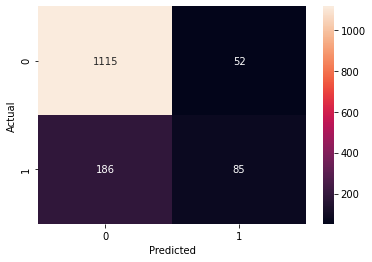

----------------------------------------------------------------------------------------------------


,Metrics,Train_ROC,Test_ROC
0,Values,0.663,0.635


ROC Curve:


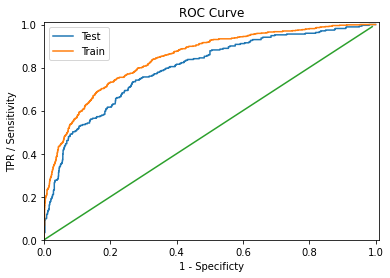

In [115]:
ada_estimator = AdaBoostClassifier(random_state=5)

ada_pipe = make_pipeline(ct, ada_estimator)

ada_pipe.fit(X_train, y_train)

#Test
y_pred_ada = ada_pipe.predict(X_test)
y_pred_ada_proba = ada_pipe.predict_proba(X_test)

#Train(just to check ovetreeitting)
y_pred_ada_train = ada_pipe.predict(X_train)
y_pred_ada_proba_train = ada_pipe.predict_proba(X_train)

calculate_metrics(y_test, y_pred_ada, y_pred_ada_proba, y_pred_ada_train,
                 y_pred_ada_proba_train)


**1st Insights**

The metrics in test are not as good as bagging models maybe, but definitely this model does not overfit as bagging models, which is better in my opinion, because it could work well on new data.

<a id="section_adaboosttuned"></a>
### 1.2) Adaboost Improved - Tuned

In [116]:
ada_pipe.named_steps.keys()

dict_keys(['columntransformer', 'adaboostclassifier'])

In [117]:
params_ada = {'adaboostclassifier__n_estimators': np.arange(10,100,10), #Number of estimators
              'adaboostclassifier__learning_rate': [0.01, 0.05, 0.10, 0.2, 0.5, 0.7, 0.9],#Learning rate.
              'adaboostclassifier__algorithm' : ['SAMME', 'SAMME.R'] #Algorithm used in the fitting.
              }

ada_tuned = GridSearchCV(ada_pipe, params_ada, cv=folds, scoring='roc_auc')


ada_tuned.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('columntransformer',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,...
                                                       

In [118]:
ada_tuned.best_estimator_[1]

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=80, random_state=5)

,Metrics,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Values,0.85,0.837,0.316,0.28,0.741,0.661


Confusion Matrix:


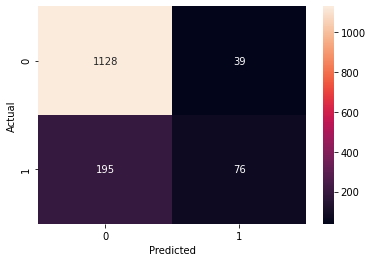

----------------------------------------------------------------------------------------------------


,Metrics,Train_ROC,Test_ROC
0,Values,0.645,0.624


ROC Curve:


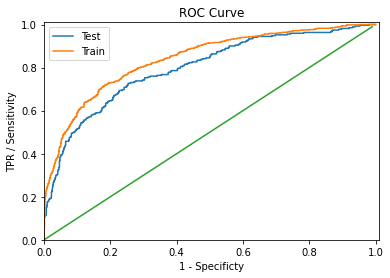

In [119]:
#Test
y_pred_ada_tuned = ada_tuned.predict(X_test)
y_pred_ada_tuned_proba = ada_tuned.predict_proba(X_test)

#Train(just to check ovetreeitting)
y_pred_ada_tuned_train = ada_tuned.predict(X_train)
y_pred_ada_tuned_proba_train = ada_tuned.predict_proba(X_train)

calculate_metrics(y_test, y_pred_ada_tuned, y_pred_ada_tuned_proba, y_pred_ada_tuned_train,
                 y_pred_ada_tuned_proba_train)

The model did not improve much if we compare it to the original version of Adaboost.

<a id="section_gradientboosting"></a>
### 2) Gradient Boosting

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

,Metrics,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Values,0.893,0.862,0.5,0.402,0.883,0.752


Confusion Matrix:


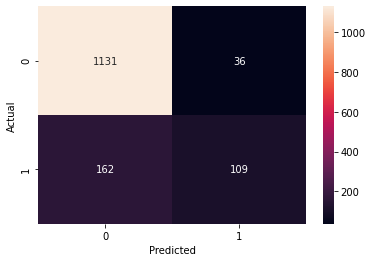

----------------------------------------------------------------------------------------------------


,Metrics,Train_ROC,Test_ROC
0,Values,0.742,0.686


ROC Curve:


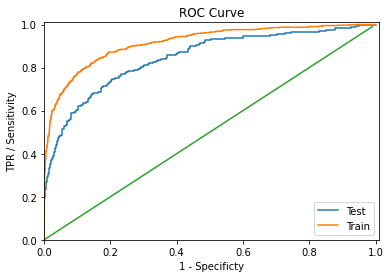

In [121]:
gbc = GradientBoostingClassifier(random_state=5)

gbc_pipe = make_pipeline(ct, gbc)

gbc_pipe.fit(X_train, y_train)

#Test
y_pred_gbc = gbc_pipe.predict(X_test)
y_pred_gbc_proba = gbc_pipe.predict_proba(X_test)

#Train(just to check ovetreeitting)
y_pred_gbc_train = gbc_pipe.predict(X_train)
y_pred_gbc_proba_train = gbc_pipe.predict_proba(X_train)

calculate_metrics(y_test, y_pred_gbc, y_pred_gbc_proba, y_pred_gbc_train,
                 y_pred_gbc_proba_train)


It seems to be slightly better than AdaBoosting. Also this model does generalizes better than Bagging methods (less overfitting)

<a id="section_gradientboostingtuned"></a>
### 2.2) Gradient Boosting improved - Tuned

In [122]:
gbc_pipe[1]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [123]:
gbc_pipe.named_steps.keys()

dict_keys(['columntransformer', 'gradientboostingclassifier'])

In [124]:
param_gbc = {'gradientboostingclassifier__learning_rate': np.arange(0, 0.5, 0.05),
             'gradientboostingclassifier__min_samples_split': [1,2,3,4,5],
             'gradientboostingclassifier__max_features': [0.4,0.6, None]
             
              }

#After trying more hyperparameters, the only ones that did not overfit the model were this one.
#I tried several more, but all of them give me scores of 100% in train, overfitting my data.

gbc_tuned = RandomizedSearchCV(gbc_pipe, param_gbc, cv=folds, scoring='roc_auc')

gbc_tuned.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('columntransformer',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='passthrough',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('onehotencoder',
                                                                               OneHotEncoder(categories='auto',
                                                                                             drop=None,
                                                                                             dtype=<class 'num

In [125]:
gbc_tuned.best_estimator_[1]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.35000000000000003, loss='deviance',
                           max_depth=3, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Parameters I obtained with the Randomized search were:
    
```GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.35000000000000003, loss='deviance',
                           max_depth=3, max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=5,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=5, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)```
    

,Metrics,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Values,0.944,0.873,0.739,0.542,0.951,0.717


Confusion Matrix:


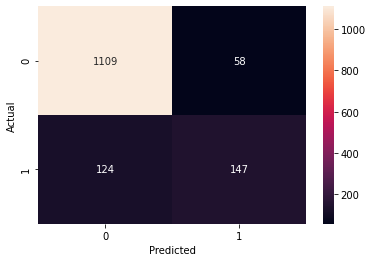

----------------------------------------------------------------------------------------------------


,Metrics,Train_ROC,Test_ROC
0,Values,0.865,0.746


ROC Curve:


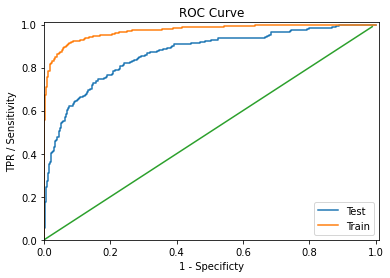

In [126]:
#Test
y_pred_gbc_tuned = gbc_tuned.predict(X_test)
y_pred_gbc_tuned_proba = gbc_tuned.predict_proba(X_test)

#Train(just to check ovetreeitting)
y_pred_gbc_tuned_train = gbc_tuned.predict(X_train)
y_pred_gbc_tuned_proba_train = gbc_tuned.predict_proba(X_train)

calculate_metrics(y_test, y_pred_gbc_tuned, y_pred_gbc_tuned_proba, y_pred_gbc_tuned_train,
                 y_pred_gbc_tuned_proba_train)


We have better performance in test but know our model is more overfitted. So in this case if I have to choose between the two of Gradient Bossting models, I'll probably keep with the first one, even though the performance in test is lower, it's more reliable.

<a id="section_xgboost"></a>
### 3) XGBoost

In [127]:
from xgboost import XGBClassifier

,Metrics,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Values,0.886,0.86,0.476,0.391,0.858,0.741


Confusion Matrix:


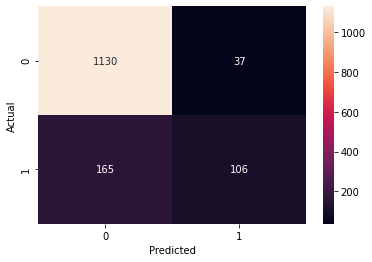

----------------------------------------------------------------------------------------------------


,Metrics,Train_ROC,Test_ROC
0,Values,0.729,0.68


ROC Curve:


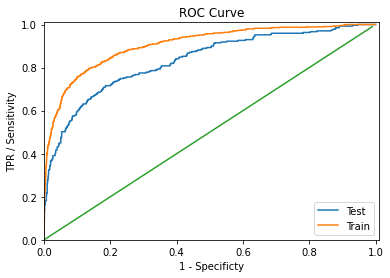

In [128]:
xgb_estimator = XGBClassifier(random_state=5)

xgb_pipe = make_pipeline(ct, xgb_estimator)

xgb_pipe.fit(X_train, y_train)

#Test
y_pred_xgb = xgb_pipe.predict(X_test)
y_pred_xgb_proba = xgb_pipe.predict_proba(X_test)

#Train(just to check ovetreeitting)
y_pred_xgb_train = xgb_pipe.predict(X_train)
y_pred_xgb_proba_train = xgb_pipe.predict_proba(X_train)

calculate_metrics(y_test, y_pred_xgb, y_pred_xgb_proba, y_pred_xgb_train,
                 y_pred_xgb_proba_train)


In [129]:
xgb_pipe[1]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

<a id="section_xgboosttuned"></a>
### 3.2) XGBoost improved - tuned

As I did with random forest, here I will also use SelectKBest to tune our model and check if I can obtain a good prediction with low overfitting.

In [130]:
xgb_pipe.named_steps.keys()

dict_keys(['columntransformer', 'xgbclassifier'])

In [132]:
xgb_pipe_tuned = make_pipeline(ct, SelectKBest(f_classif), xgb_estimator)

param_xgb = {'selectkbest__k':[5,10,15,20,30],#We have 30 features after onehot encoding that's why 32.
                  'xgbclassifier__max_depth': [5,10,15]#I'll try low numbers to see if I can avoid ovexgbitting
                  ,'xgbclassifier__n_estimators':[100, 150, 200,300]
             ,'xgbclassifier__min_samples_leaf':[20,30,50,100]
                  ,'xgbclassifier__gamma':[0.1, 0.5, 2, 5, 10] #They're way too high but I want to reduce O.Fitting.
             ,'xgbclassifier__subsample':[0.7,0.8,0.9]
            } 

xgb_tuned = RandomizedSearchCV(xgb_pipe_tuned, param_xgb, cv=folds, scoring='roc_auc')

xgb_tuned.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('columntransformer',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='passthrough',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('onehotencoder',
                                                                               OneHotEncoder(categories='auto',
                                                                                             drop=None,
                                                                                             dtype=<class 'num

In [133]:
xgb_tuned.best_estimator_[2]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, min_samples_leaf=20, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=5, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.7, verbosity=1)

Parameters of the Randomized Search in my run:

```XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=5,
              learning_rate=0.1, max_delta_step=0, max_depth=15,
              min_child_weight=1, min_samples_leaf=20, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=5, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=0.7, verbosity=1)```

,Metrics,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Values,0.926,0.873,0.666,0.491,0.917,0.747


Confusion Matrix:


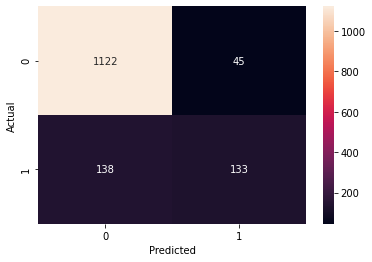

----------------------------------------------------------------------------------------------------


,Metrics,Train_ROC,Test_ROC
0,Values,0.826,0.726


ROC Curve:


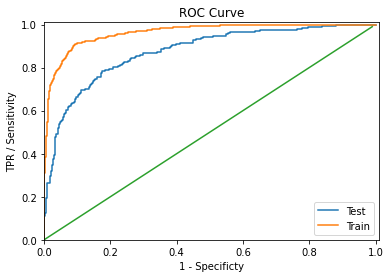

In [134]:
#Test
y_pred_xgb_tuned = xgb_tuned.predict(X_test)
y_pred_xgb_tuned_proba = xgb_tuned.predict_proba(X_test)

#Train(just to check ovetreeitting)
y_pred_xgb_tuned_train = xgb_tuned.predict(X_train)
y_pred_xgb_tuned_proba_train = xgb_tuned.predict_proba(X_train)

calculate_metrics(y_test, y_pred_xgb_tuned, y_pred_xgb_tuned_proba, y_pred_xgb_tuned_train,
                 y_pred_xgb_tuned_proba_train)

<a id="section_stacking"></a>
# Stacking

In [135]:
from sklearn.ensemble import StackingClassifier

What I tried here, is to combine two models that are not much overfitted (The Random Forest tuned v2, and the Gradient Boosting tuned), with a model which was overfitted (Bagging Classifier tuned)

In [141]:
estimators=[('Random Forest', grid_rf_tuned_2.best_estimator_[2]),('Bagging Classifier', grid_bg_tuned_gd.best_estimator_[1]),
           ('Gradient Boosting', gbc_pipe[1])]
final_estimator=XGBClassifier(random_state=1)

As I have the other processes in the pipes of each model, I wanted only to keep with the part of each algorithm use.

In [142]:
#Checking that in the estimators I only have the algorithms parameters and no other part of the pipeline
estimators

[('Random Forest',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                         class_weight={0: 0.2, 1: 0.8}, criterion='gini',
                         max_depth=15, max_features='auto', max_leaf_nodes=None,
                         max_samples=None, min_impurity_decrease=0.0,
                         min_impurity_split=None, min_samples_leaf=20,
                         min_samples_split=2, min_weight_fraction_leaf=0.0,
                         n_estimators=100, n_jobs=None, oob_score=False,
                         random_state=5, verbose=0, warm_start=False)),
 ('Bagging Classifier',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
      

Parameters of the models I stacked. I am adding this in case someone run it again, because the RandomizedSearchCV may arrives in slightly different results.

```
[('Random Forest',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                         class_weight={0: 0.2, 1: 0.8}, criterion='gini',
                         max_depth=15, max_features='auto', max_leaf_nodes=None,
                         max_samples=None, min_impurity_decrease=0.0,
                         min_impurity_split=None, min_samples_leaf=20,
                         min_samples_split=2, min_weight_fraction_leaf=0.0,
                         n_estimators=100, n_jobs=None, oob_score=False,
                         random_state=5, verbose=0, warm_start=False)),
 ('Bagging Classifier',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=1538648557, splitter='best')),
 ('Gradient Boosting',
  GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                             learning_rate=0.1, loss='deviance', max_depth=3,
                             max_features=None, max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             min_samples_leaf=1, min_samples_split=2,
                             min_weight_fraction_leaf=0.0, n_estimators=100,
                             n_iter_no_change=None, presort='deprecated',
                             random_state=5, subsample=1.0, tol=0.0001,
                             validation_fraction=0.1, verbose=0,
                             warm_start=False))]```

In [143]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)

stacking_pipe = make_pipeline(ct, stacking_estimator)

stacking_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  ['Occupation',
                                                   'PreferredPropertyStar',
                                                   'MaritalStatus',
                                                   'De

,Metrics,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Values,0.962,0.885,0.809,0.587,0.985,0.75


Confusion Matrix:


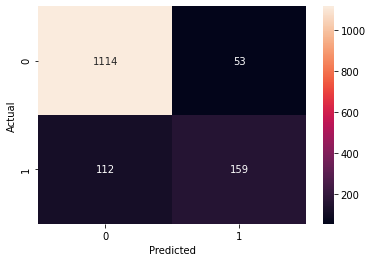

----------------------------------------------------------------------------------------------------


,Metrics,Train_ROC,Test_ROC
0,Values,0.903,0.771


ROC Curve:


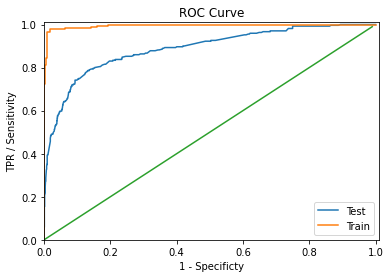

In [144]:
#Test
y_pred_stacking = stacking_pipe.predict(X_test)
y_pred_stacking_proba = stacking_pipe.predict_proba(X_test)

#Train(just to check ovetreeitting)
y_pred_stacking_train = stacking_pipe.predict(X_train)
y_pred_stacking_proba_train = stacking_pipe.predict_proba(X_train)

calculate_metrics(y_test, y_pred_stacking, y_pred_stacking_proba, y_pred_stacking_train,
                 y_pred_stacking_proba_train)

The results were pretty good. We can still see a gap between the train curve and the test curve, but it's definitely less overfitted than other models we've seen during the Notebook.

<a id="section_model_comparison"></a>
# Model Comparison 

For model comparison, I will create a dataframe where we can compare all the models built in the NB.
Below that, i will build an interactive object (confusion matrix + metrix), where we can play around with the different models and the different possibilities for the treshold.

In [145]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn.metrics import precision_recall_fscore_support, accuracy_score,confusion_matrix

In [146]:
models=['Bagging Classifier', 'Bagging Classifier tuned',
                                          'Random Forest', 'Random Forest tuned', 'Random Forest tuned 2',
                                          'Decision Tree', 'Decision Tree tuned', 'Ada Boost', 'Ada Boost tuned',
                                          'Gradient Boosting', 'Gradient Boosting tuned', 'XGBoost', 'XGBoost tuned',
                                          'Stacking']

predictions_test = [y_pred_bagging_estimator, y_pred_bg_tuned, y_pred_rf_estimator, y_pred_rf_estimator_tuned,
y_pred_rf_estimator_tuned_2, y_pred_tree_estimator, y_pred_tree_tuned, y_pred_ada, y_pred_ada_tuned, y_pred_gbc,
y_pred_gbc_tuned, y_pred_xgb, y_pred_xgb_tuned, y_pred_stacking]

predictions_train = [y_pred_bagging_estimator_train, y_pred_bg_tuned_train, y_pred_rf_estimator_train, y_pred_rf_estimator_train_tuned,
y_pred_rf_estimator_train_tuned_2, y_pred_tree_estimator_train, y_pred_tree_tuned_train, y_pred_ada_train, y_pred_ada_tuned_train, y_pred_gbc_train,
y_pred_gbc_tuned_train, y_pred_xgb_train, y_pred_xgb_tuned_train, y_pred_stacking_train]


dictionary_test = dict(zip(models,predictions_test))
dictionary_train = dict(zip(models,predictions_train))

# defining empty lists to add train and test results
Acc_train = []
Acc_test = []
Recall_train= []
Recall_test= []
Precision_train= []
Precision_test= []
ROC_AUC_train= []
ROC_AUC_test= []

for model in models:
    acc_train = accuracy_score(y_train, dictionary_train[model])
    acc_test = accuracy_score(y_test, dictionary_test[model])
    rec_train = recall_score(y_train, dictionary_train[model])
    rec_test = recall_score(y_test, dictionary_test[model])
    prec_train = precision_score(y_train, dictionary_train[model])
    prec_test = precision_score(y_test, dictionary_test[model])
    roc_train = roc_auc_score(y_train, dictionary_train[model])
    roc_test = roc_auc_score(y_test, dictionary_test[model])
    Acc_train.append(round(acc_train,2))
    Acc_test.append(round(acc_test,2))
    Recall_train.append(round(rec_train,2))
    Recall_test.append(round(rec_test,2))
    Precision_train.append(round(prec_train,2))
    Precision_test.append(round(prec_test,2))
    ROC_AUC_train.append(round(roc_train,2))
    ROC_AUC_test.append(round(roc_test,2))
    
comparison_frame = pd.DataFrame({'Model':models, 
                                          'Acc_train': Acc_train,'Acc_test': Acc_test,
                                          'Recall_train':Recall_train,'Recall_test':Recall_test,
                                            'Precision_train':Precision_train, 'Precision_test':Precision_test,
                                            'ROC_AUC_train':ROC_AUC_train, 'ROC_AUC_test':ROC_AUC_test}) 


@interact(punto_corte=(0, 1, 0.01), model=['Bagging Classifier', 'Bagging Classifier tuned',
                                          'Random Forest', 'Random Forest tuned', 'Random Forest tuned 2',
                                          'Decision Tree', 'Decision Tree tuned', 'Ada Boost', 'Ada Boost tuned',
                                          'Gradient Boosting', 'Gradient Boosting tuned', 'XGBoost', 'XGBoost tuned',
                                          'Stacking'])

def funcion(model, punto_corte=0.5):
    if model == 'Bagging Classifier':
        sel_model = y_pred_bagging_estimator_proba
    elif model == 'Bagging Classifier tuned':
        sel_model = y_pred_bg_tuned_proba
    elif model == 'Random Forest':
        sel_model = y_pred_rf_estimator_proba
    elif model == 'Random Forest tuned':
        sel_model = y_pred_rf_estimator_proba_tuned
    elif model == 'Random Forest tuned 2':
        sel_model = y_pred_rf_estimator_proba_tuned_2
    elif model == 'Decision Tree':
        sel_model = y_pred_tree_estimator_proba
    elif model == 'Decision Tree tuned':
        sel_model = y_pred_tree_tuned_proba
    elif model == 'Ada Boost':
        sel_model = y_pred_ada_proba
    elif model == 'Ada Boost tuned':
        sel_model = y_pred_ada_tuned_proba
    elif model == 'Gradient Boosting':
        sel_model = y_pred_gbc_proba
    elif model == 'Gradient Boosting tuned':
        sel_model = y_pred_gbc_tuned_proba
    elif model == 'XGBoost':
        sel_model = y_pred_xgb_proba
    elif model == 'XGBoost tuned':
        sel_model = y_pred_xgb_tuned_proba
    elif model == 'Stacking':
        sel_model = y_pred_stacking_proba
    
    Y_pred = np.where(sel_model > punto_corte, 1, 0)
    conf_mat = pd.crosstab(y_test, Y_pred[:,1], rownames = ['Actual'], colnames = ['Predicted'])
    sns.heatmap(conf_mat, annot=True, fmt='g')
    
    res = precision_recall_fscore_support(y_test, Y_pred[:,1], average = 'binary')
    roc_auc = roc_auc_score(y_test, Y_pred[:,1])
    print("\nAccuracy = %0.2f, Recall = %0.2f, Precision = %0.2f, F1 = %0.2f\n" % (accuracy_score(y_test, Y_pred[:,1]), res[1], res[0], res[2]))
    print('The ROC_AUC_SCORE is: ' + str(round(roc_auc,2)))

comparison_frame
    



interactive(children=(Dropdown(description='model', options=('Bagging Classifier', 'Bagging Classifier tuned',…

,Model,Acc_train,Acc_test,Recall_train,Recall_test,Precision_train,Precision_test,ROC_AUC_train,ROC_AUC_test
0,Bagging Classifier,0.99,0.90,0.96,0.59,1.00,0.83,0.98,0.78
1,Bagging Classifier tuned,1.00,0.93,1.00,0.66,1.00,0.93,1.00,0.83
2,Random Forest,1.00,0.90,1.00,0.52,1.00,0.91,1.00,0.75
3,Random Forest tuned,0.90,0.83,0.85,0.66,0.68,0.54,0.88,0.76
4,Random Forest tuned 2,0.86,0.81,0.76,0.65,0.59,0.50,0.82,0.75
5,Decision Tree,1.00,0.87,1.00,0.69,1.00,0.65,1.00,0.80
6,Decision Tree tuned,0.90,0.83,0.62,0.45,0.80,0.56,0.79,0.69
7,Ada Boost,0.85,0.83,0.36,0.31,0.72,0.62,0.66,0.63
8,Ada Boost tuned,0.85,0.84,0.32,0.28,0.74,0.66,0.65,0.62
9,Gradient Boosting,0.89,0.86,0.50,0.40,0.88,0.75,0.74,0.69


We can see that the Interactive object is a very useful resource, cause we can compare all the models we have and check which one is better for our business objective (by selecting the treshold).

In my opinion, I will recommend three models, which have a nice performance and also the overfitting is acceptable.

- Random Forest tuned v2 
- Gradient Boosting
- Stacking model

Both three have quite similar performances, and as I've said before, there are not that overfitted in comparisson with other models. Off course if we check only test data, there are other models wiht better performance, but the problem in those cases is that the performance in train data is almost perfect (overfitting it).

<a id="section_treshold"></a>
**Which treshold is the best?**

As I wrote at the beginning of the modelling part, the metric that we may want to improve is precision, so the company maximes the budget with customer that are most likely to take the products. If we select "Stacking" model for example, we could choose a treshold of 0.75, which gives us good precision (higher than 80%) and a good roc_auc_score.

<a id="section_recommendations"></a>
**Insights**

In this last section I will try to conclude the project with some insights and recommendations for the clients. To achieve that, I will analyze feature importance of two models: Random forest tuned, and Gradient Boosting.

Random Forest:

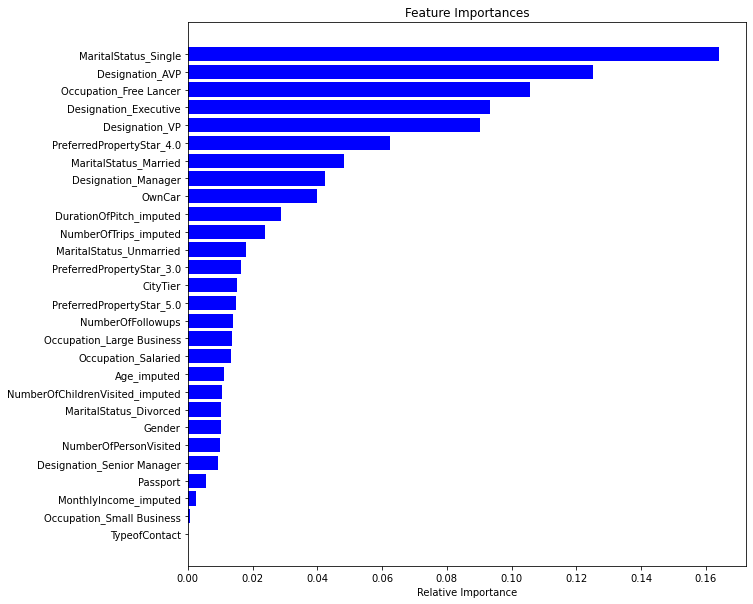

In [147]:
feature_names = X_train_gd.columns
importances = grid_rf_tuned.best_estimator_[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Gradient Boosting

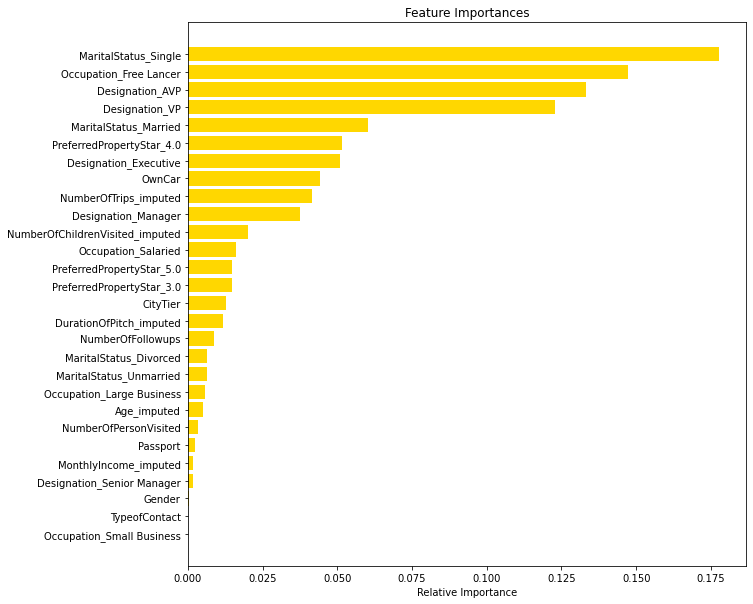

In [148]:
feature_names = X_train_gd.columns
importances = gbc_pipe[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='gold', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

This graphs can give us some interesting insights that maybe could help the company to sell their new package. For example, for this two algorithms, ```MaritalStatus```, ```Designation``` and ```Gender``` are among the most important features. We can see that Females Customers who are Single, and have a higher Designation Executive or above are quite present in terms of importance in our models. So maybe the company should focus in this kind of "profile".

**Conclusion and Recommendations**

During the entire NB, I have tried several Machine Learning algorithms which tried to predict if a customer is going to purchase a package or not. We have seen that many of the models I tried were overfitted, meaning that probably those models will not generalize well with new data. This is why I recommended to keep with models that were not overfitted, even though their performance was not the best. 

Also, something that we must take into account during this analysis, is that we are predicting if a customer is purchasing a package or not, but we do not care about which package is going to purchase. This is because the main objective of the research was to introduce a new package (which was not in the dataset) and see how it performs. The best thing to do here, probably is that the company launches this new package, gather new data, and then analyze this data and the different models again, because right now, we were trying to predict something that does not exist yet, which can be misleading in some sense.